# Gender Discrimination Lawsuit

A few years ago, the United States District Court of Houston had a case that arises under Title VII of the Civil Rights Act of 1964, 42 U.S.C. 200e et seq. The plaintiffs in this case were all female doctors at Houston College of Medicine who claimed that the College has engaged in a pattern and practice of discrimination against women in giving promotions and setting salaries. The Lead plaintiff in this action, a pediatrician and an assistant professor, was denied for promotion at the College. The plaintiffs had presented a set of data to show that female faculty at the school were less likely to be full professors, more likely to be assistant professors, and earn less money than men, on average. 


1 Dept: 1=Biochemistry/Molecular Biology2=Physiology 3=Genetics 4=Pediatrics 5=Medicine 6=Surgery 

2 Gender: 1=Male, 0=Female 

3 Clin: 1=Primarily clinical emphasis, 0=Primarily research emphasis 

4 Cert: 1=Board certified, 0=not certified 

5 Prate: Publication rate (# publications on cv)/(# years between CV date and MD date) 

6 Exper: # years since obtaining MD 

7 Rank: 1=Assistant, 2=Associate, 3=Full professor (a proxy for productivity) 

8 Sal94: Salary in academic year 1994 

9 Sal95: Salary after increment to 1994

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [180]:
df = pd.read_csv('Lawsuit.csv')

df['sal_increase'] = (df['Sal95'] - df['Sal94'])/ df['Sal94']

# Define category mappings
dept_map = {1: 'Biochemistry/Molecular Biology', 2: 'Physiology', 3: 'Genetics', 
            4: 'Pediatrics', 5: 'Medicine', 6: 'Surgery'}
gender_map = {1: 'Male', 0: 'Female'}
clin_map = {1: 'Primarily clinical emphasis', 0: 'Primarily research emphasis'}
cert_map = {1: 'Board certified', 0: 'Not certified'}
rank_map = {1: 'Assistant', 2: 'Associate', 3: 'Full professor'}

# Convert columns to categorical
df['Dept'] = df['Dept'].map(dept_map).astype('category')
df['Gender'] = df['Gender'].map(gender_map).astype('category')
df['Clin'] = df['Clin'].map(clin_map).astype('category')
df['Cert'] = df['Cert'].map(cert_map).astype('category')
df['Rank'] = df['Rank'].map(rank_map).astype('category')

# Display updated data types
df.head()

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,sal_increase
0,1,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,7.4,9,Full professor,77836,84612,0.087055
1,2,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,6.7,10,Associate,69994,78497,0.121482
2,3,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,8.1,6,Assistant,62872,67756,0.077682
3,4,Biochemistry/Molecular Biology,Male,Primarily clinical emphasis,Board certified,5.1,27,Full professor,155196,173220,0.116137
4,5,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,7.0,10,Full professor,89268,96099,0.076522


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            261 non-null    int64   
 1   Dept          261 non-null    category
 2   Gender        261 non-null    category
 3   Clin          261 non-null    category
 4   Cert          261 non-null    category
 5   Prate         261 non-null    float64 
 6   Exper         261 non-null    int64   
 7   Rank          261 non-null    category
 8   Sal94         261 non-null    int64   
 9   Sal95         261 non-null    int64   
 10  sal_increase  261 non-null    float64 
dtypes: category(5), float64(2), int64(4)
memory usage: 14.3 KB


## Gender Value Counts

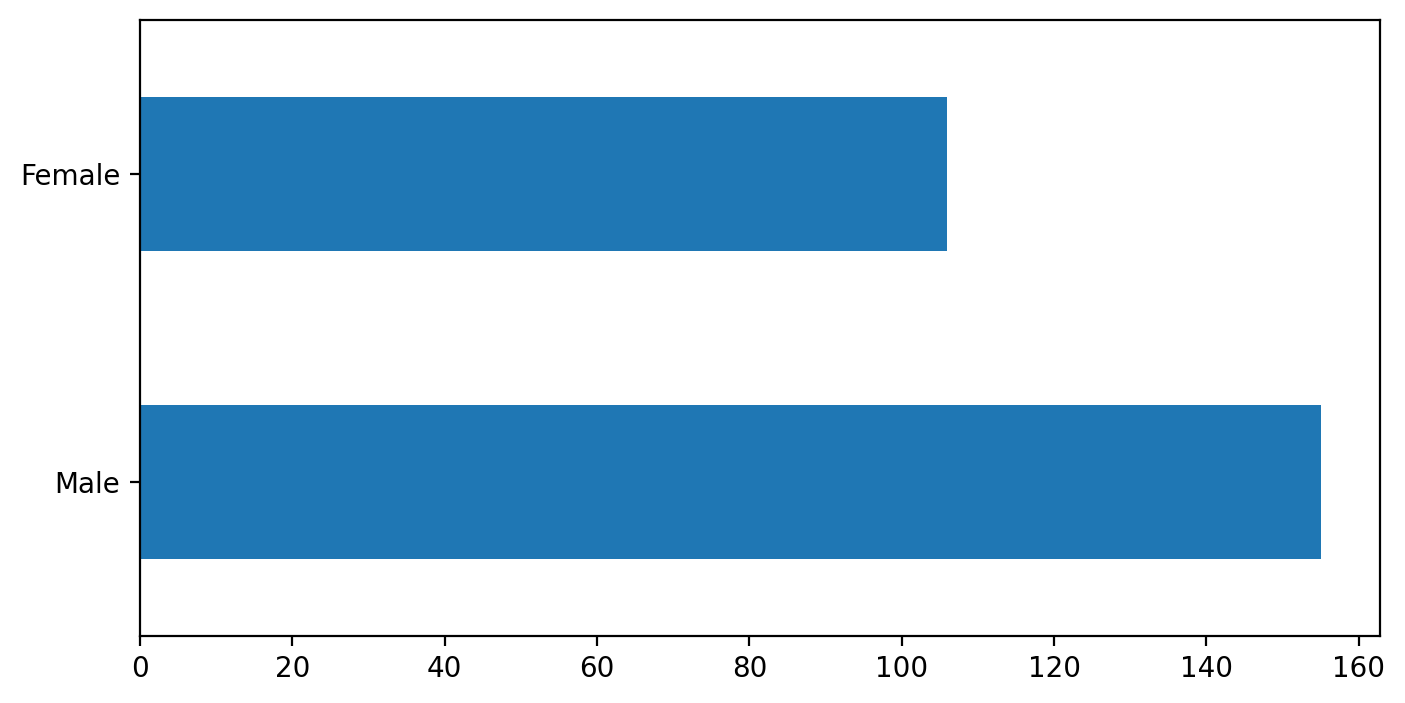

In [189]:
f, ax = plt.subplots(figsize=(8,4), dpi=200)

df.Gender.value_counts().plot(kind='barh')

plt.show();

## Raw Salary

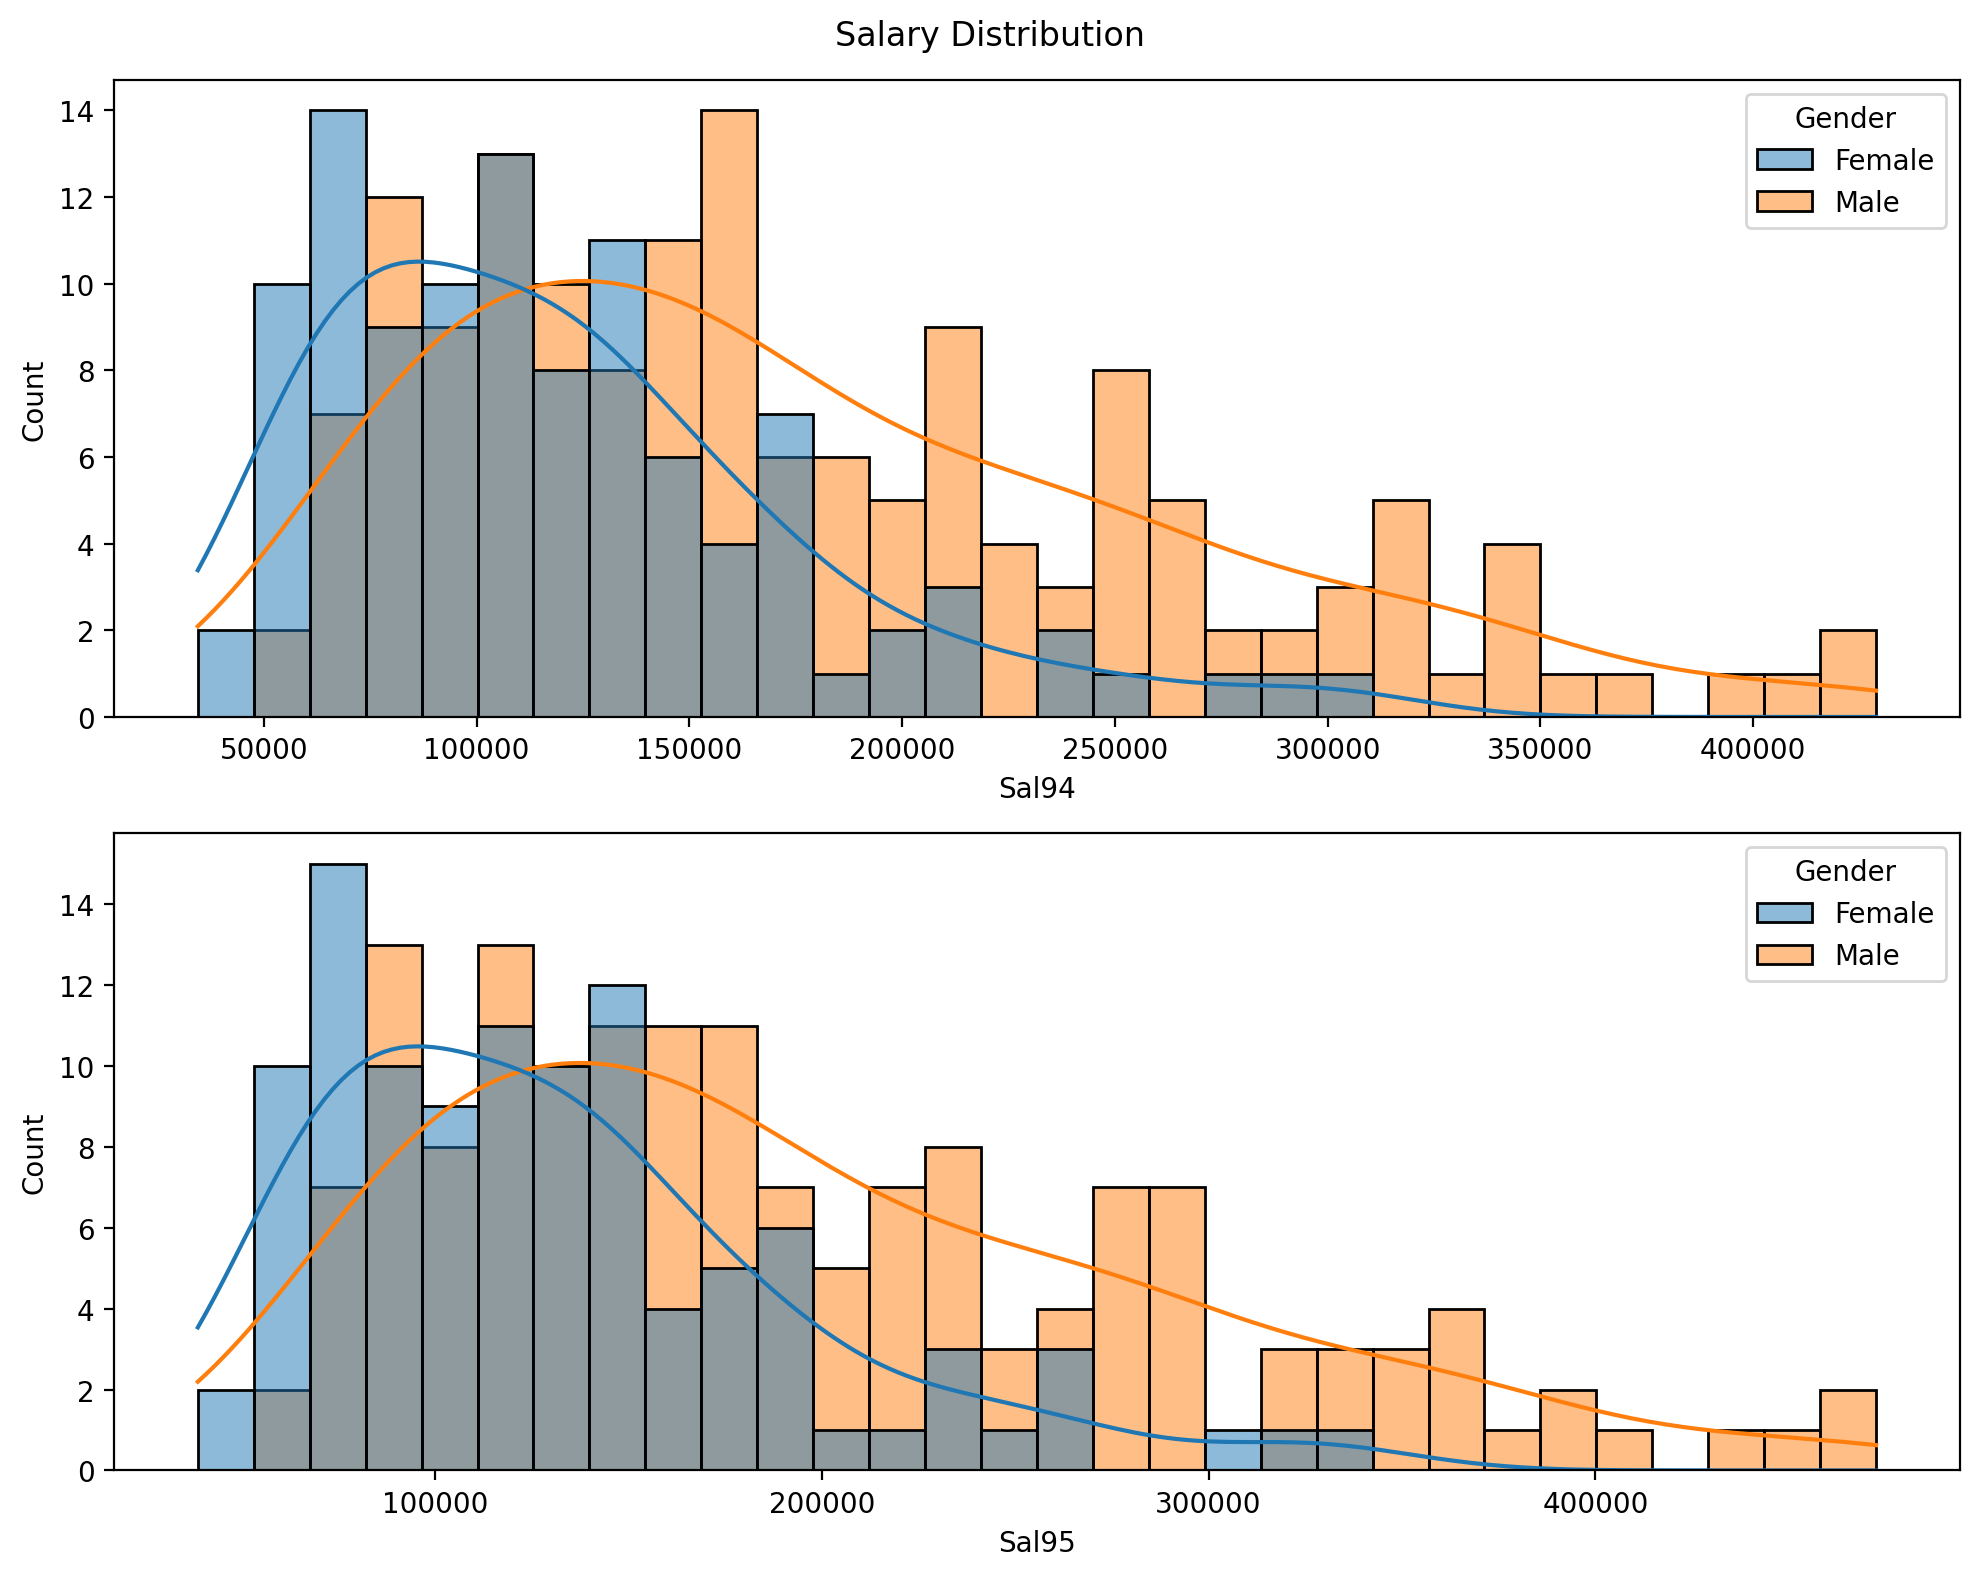

In [193]:
f, ax = plt.subplots(2,1, figsize=(10,8), dpi=200)
sns.histplot(data=df, x='Sal94', hue='Gender', kde=True, ax=ax[0], bins=30)
sns.histplot(data=df, x='Sal95', hue='Gender', kde=True, ax=ax[1], bins=30)

plt.suptitle('Salary Distribution')
plt.tight_layout()
plt.show();

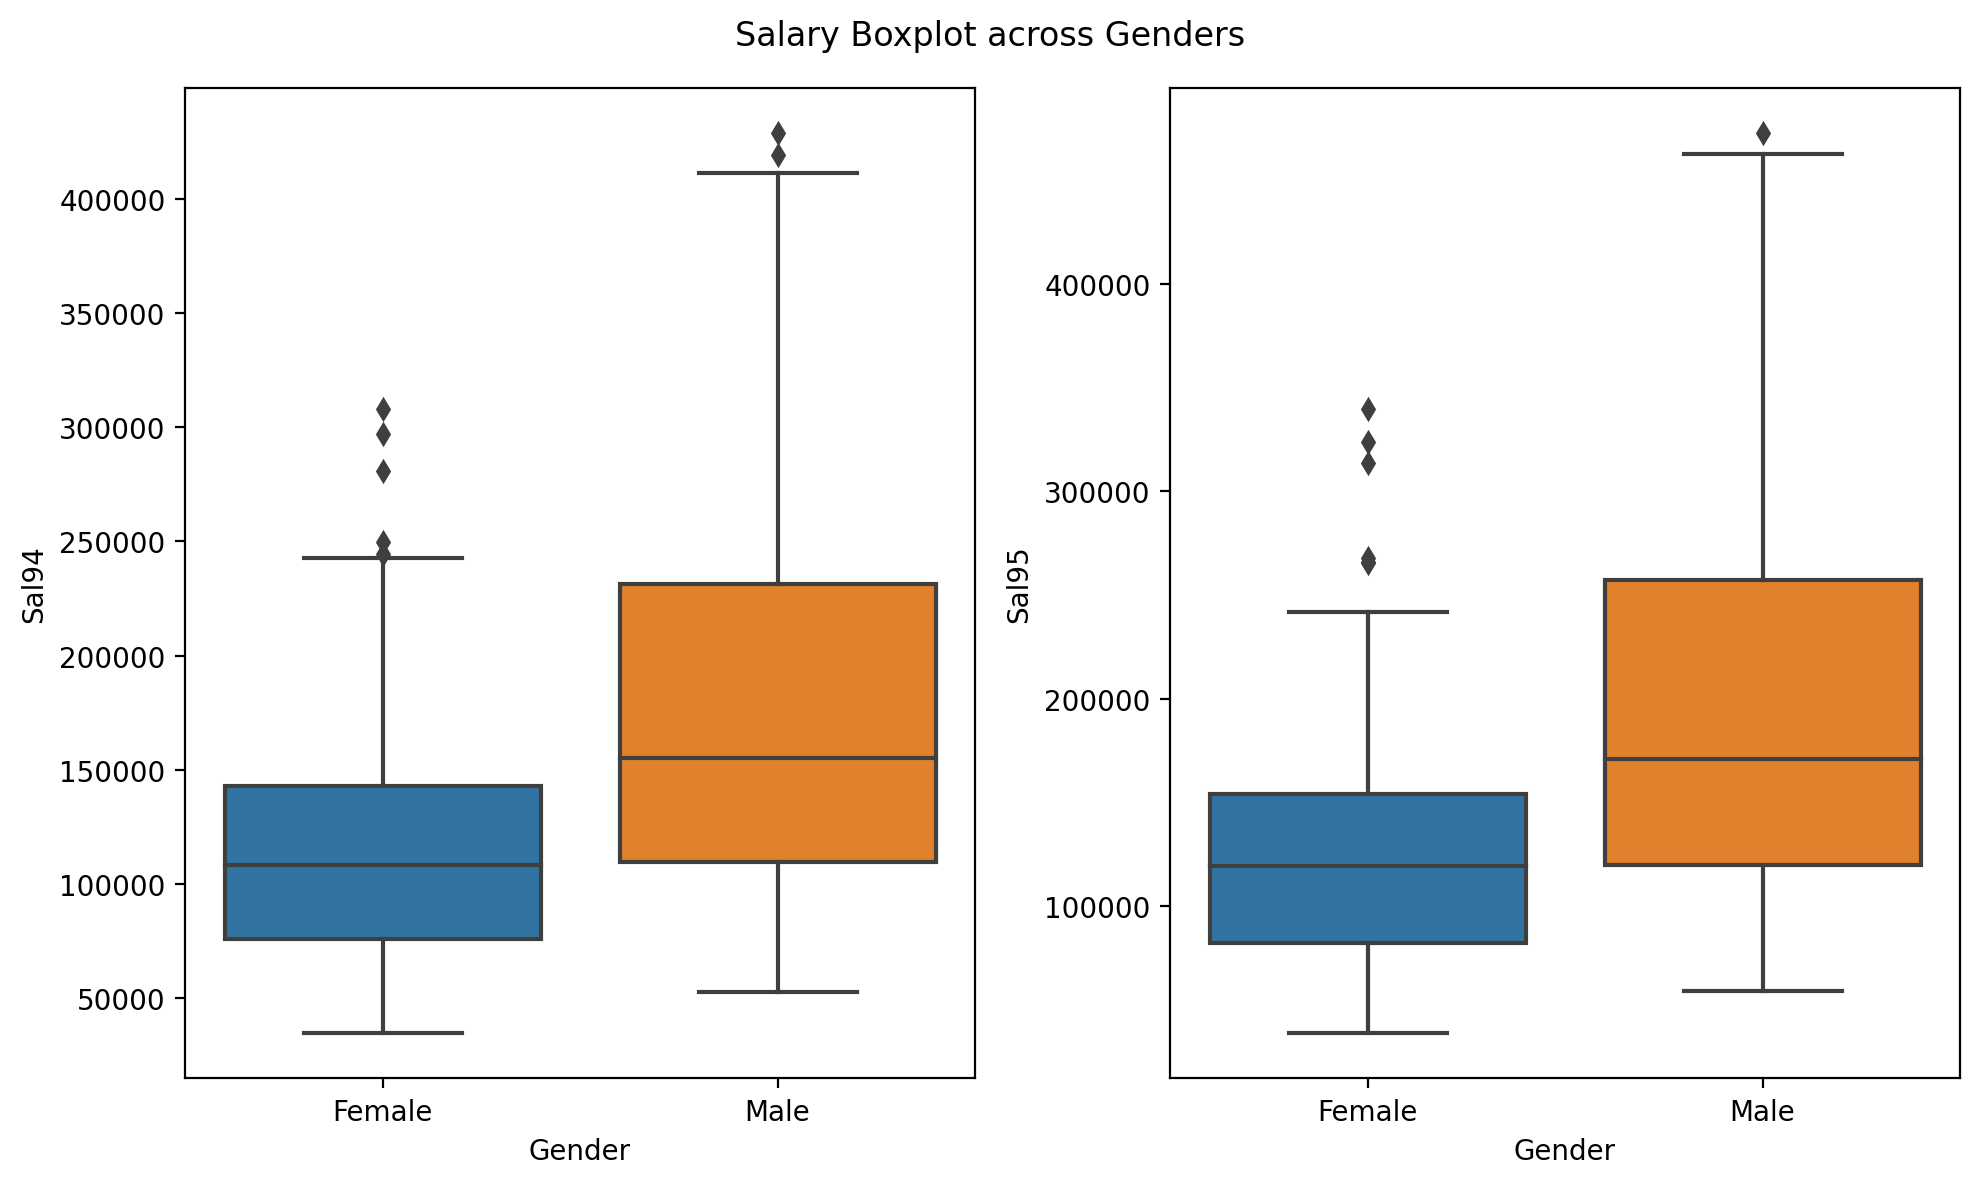

In [194]:
f, ax = plt.subplots(1,2, figsize=(10,6), dpi=200)
sns.boxplot(data=df, x='Gender', y='Sal94', ax=ax[0])
sns.boxplot(data=df, x='Gender', y='Sal95', ax=ax[1])

plt.suptitle('Salary Boxplot across Genders')
plt.tight_layout()
plt.show();

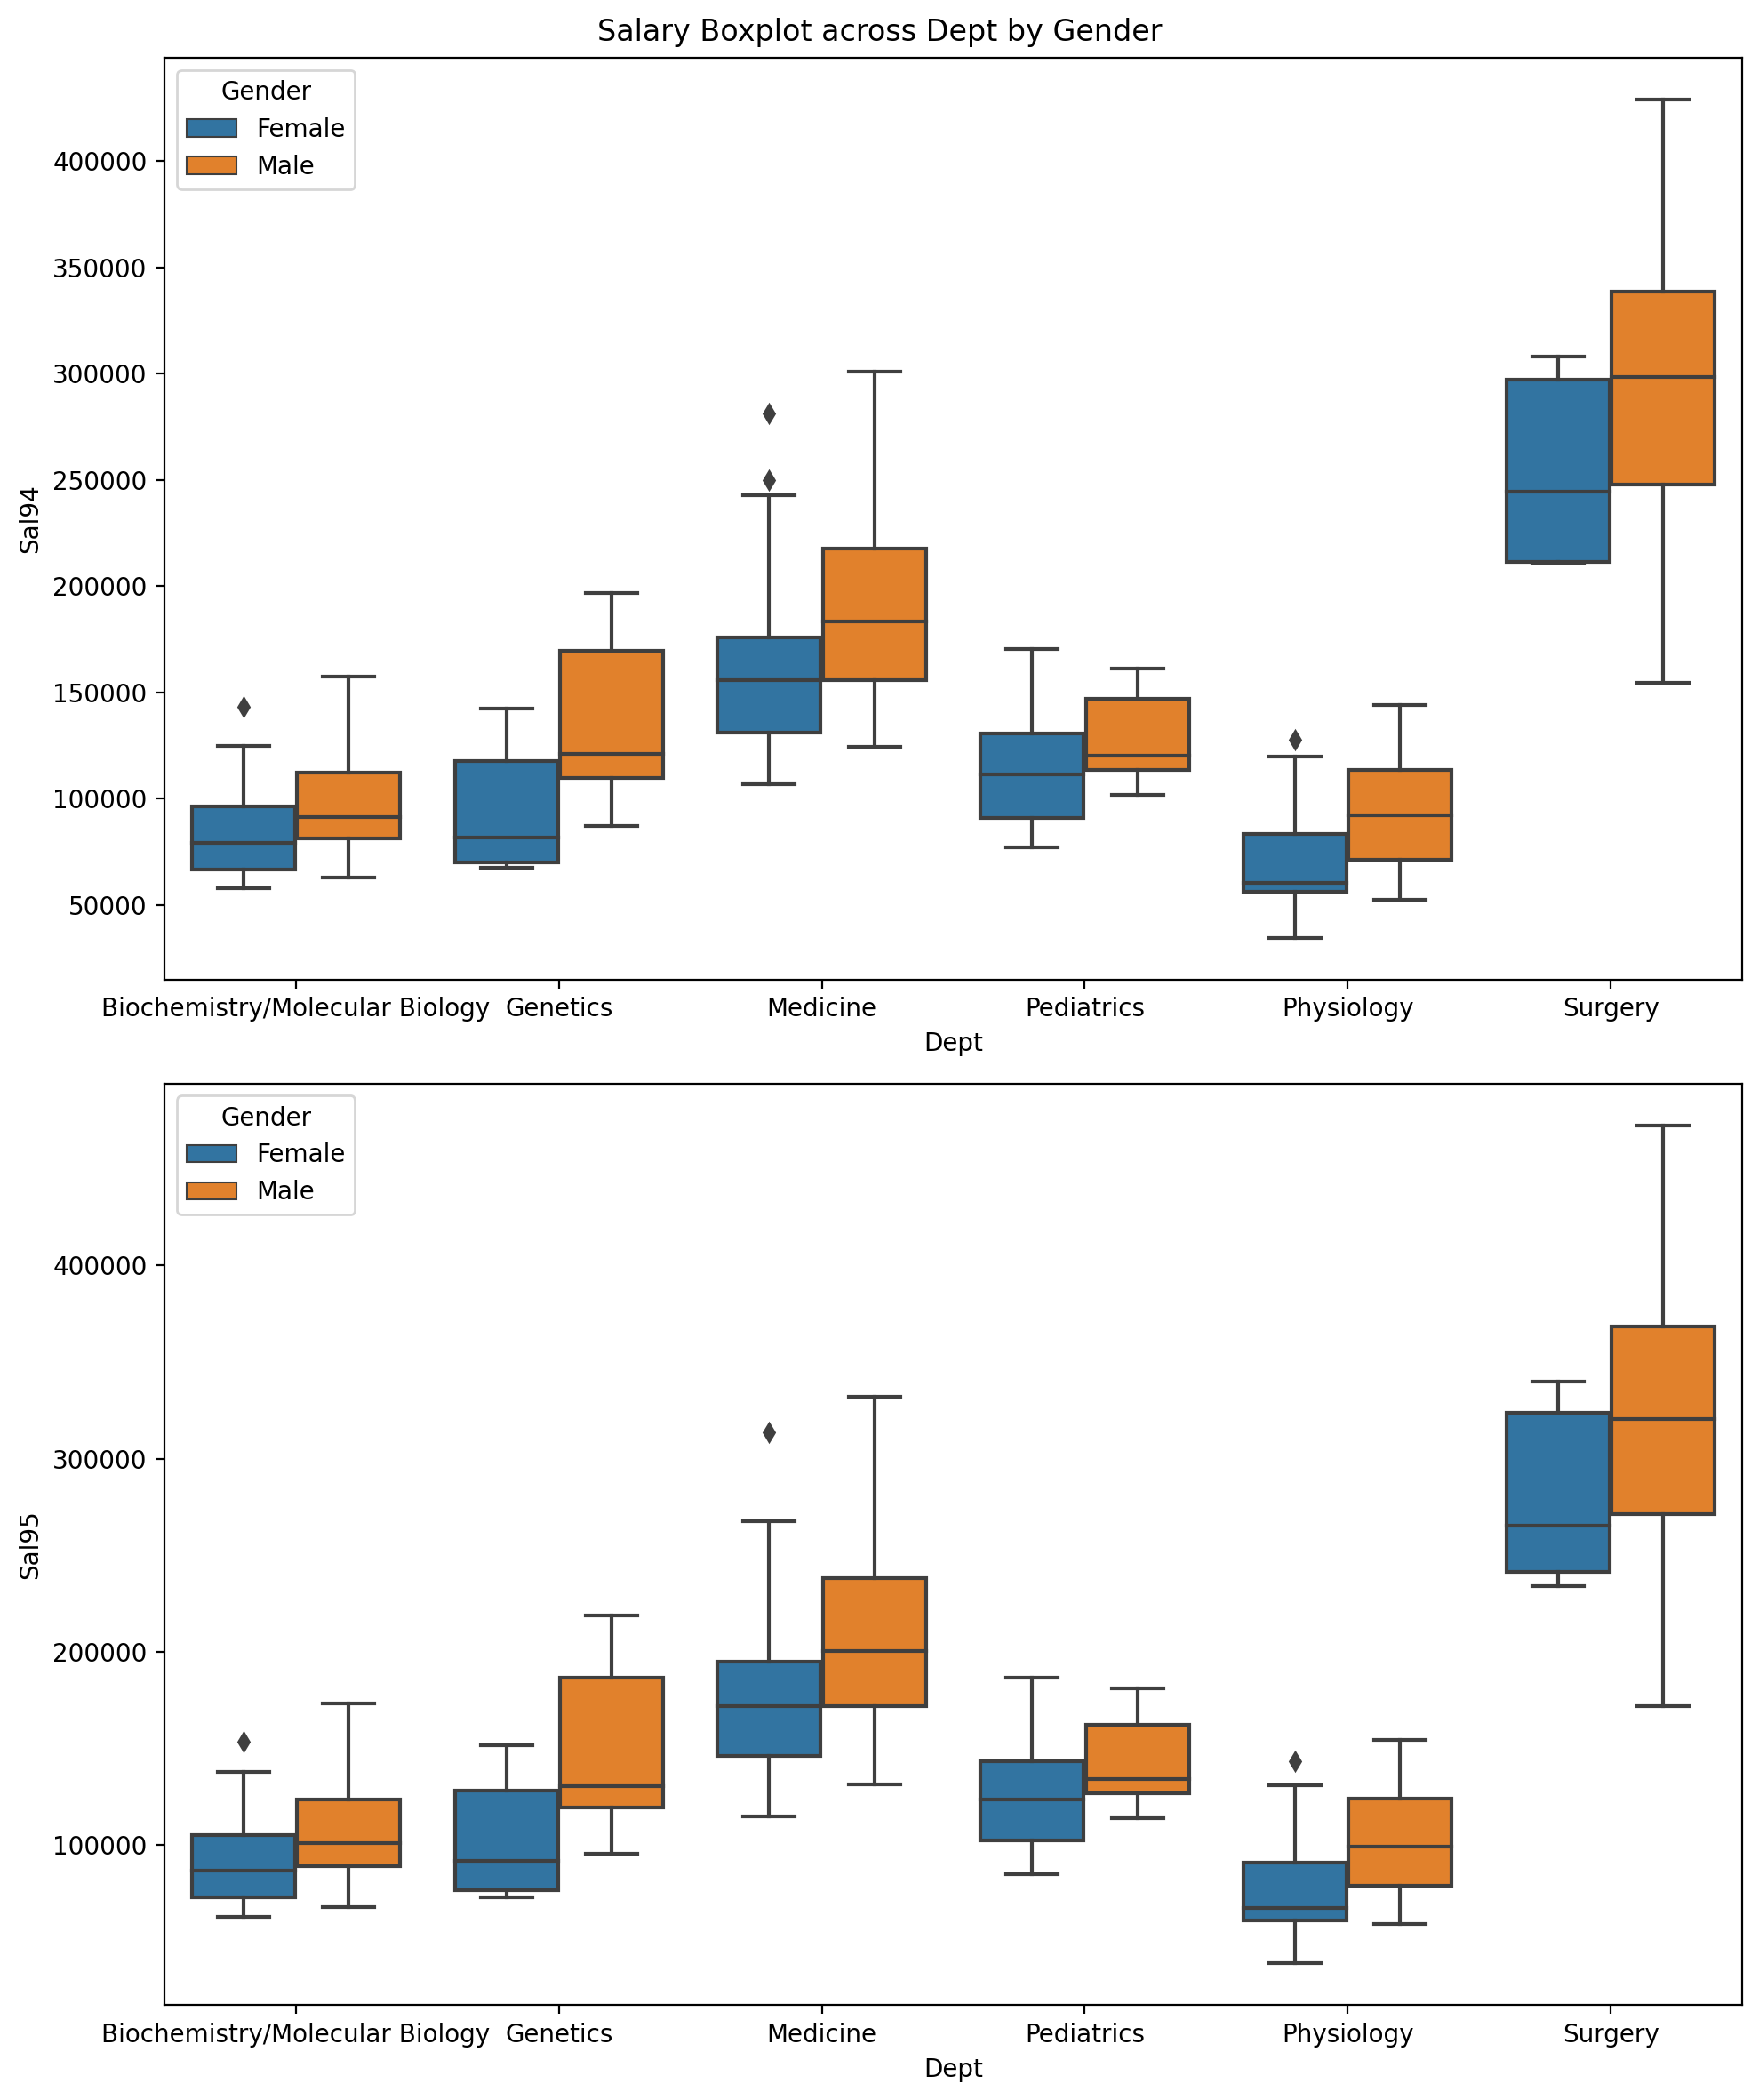

In [201]:
f, ax = plt.subplots(2,1, figsize=(10,12), dpi=200)
sns.boxplot(data=df, x='Dept', y='Sal94', hue='Gender', ax=ax[0])
sns.boxplot(data=df, x='Dept', y='Sal95', hue='Gender', ax=ax[1])

plt.suptitle('Salary Boxplot across Dept by Gender')
plt.tight_layout()
plt.show();

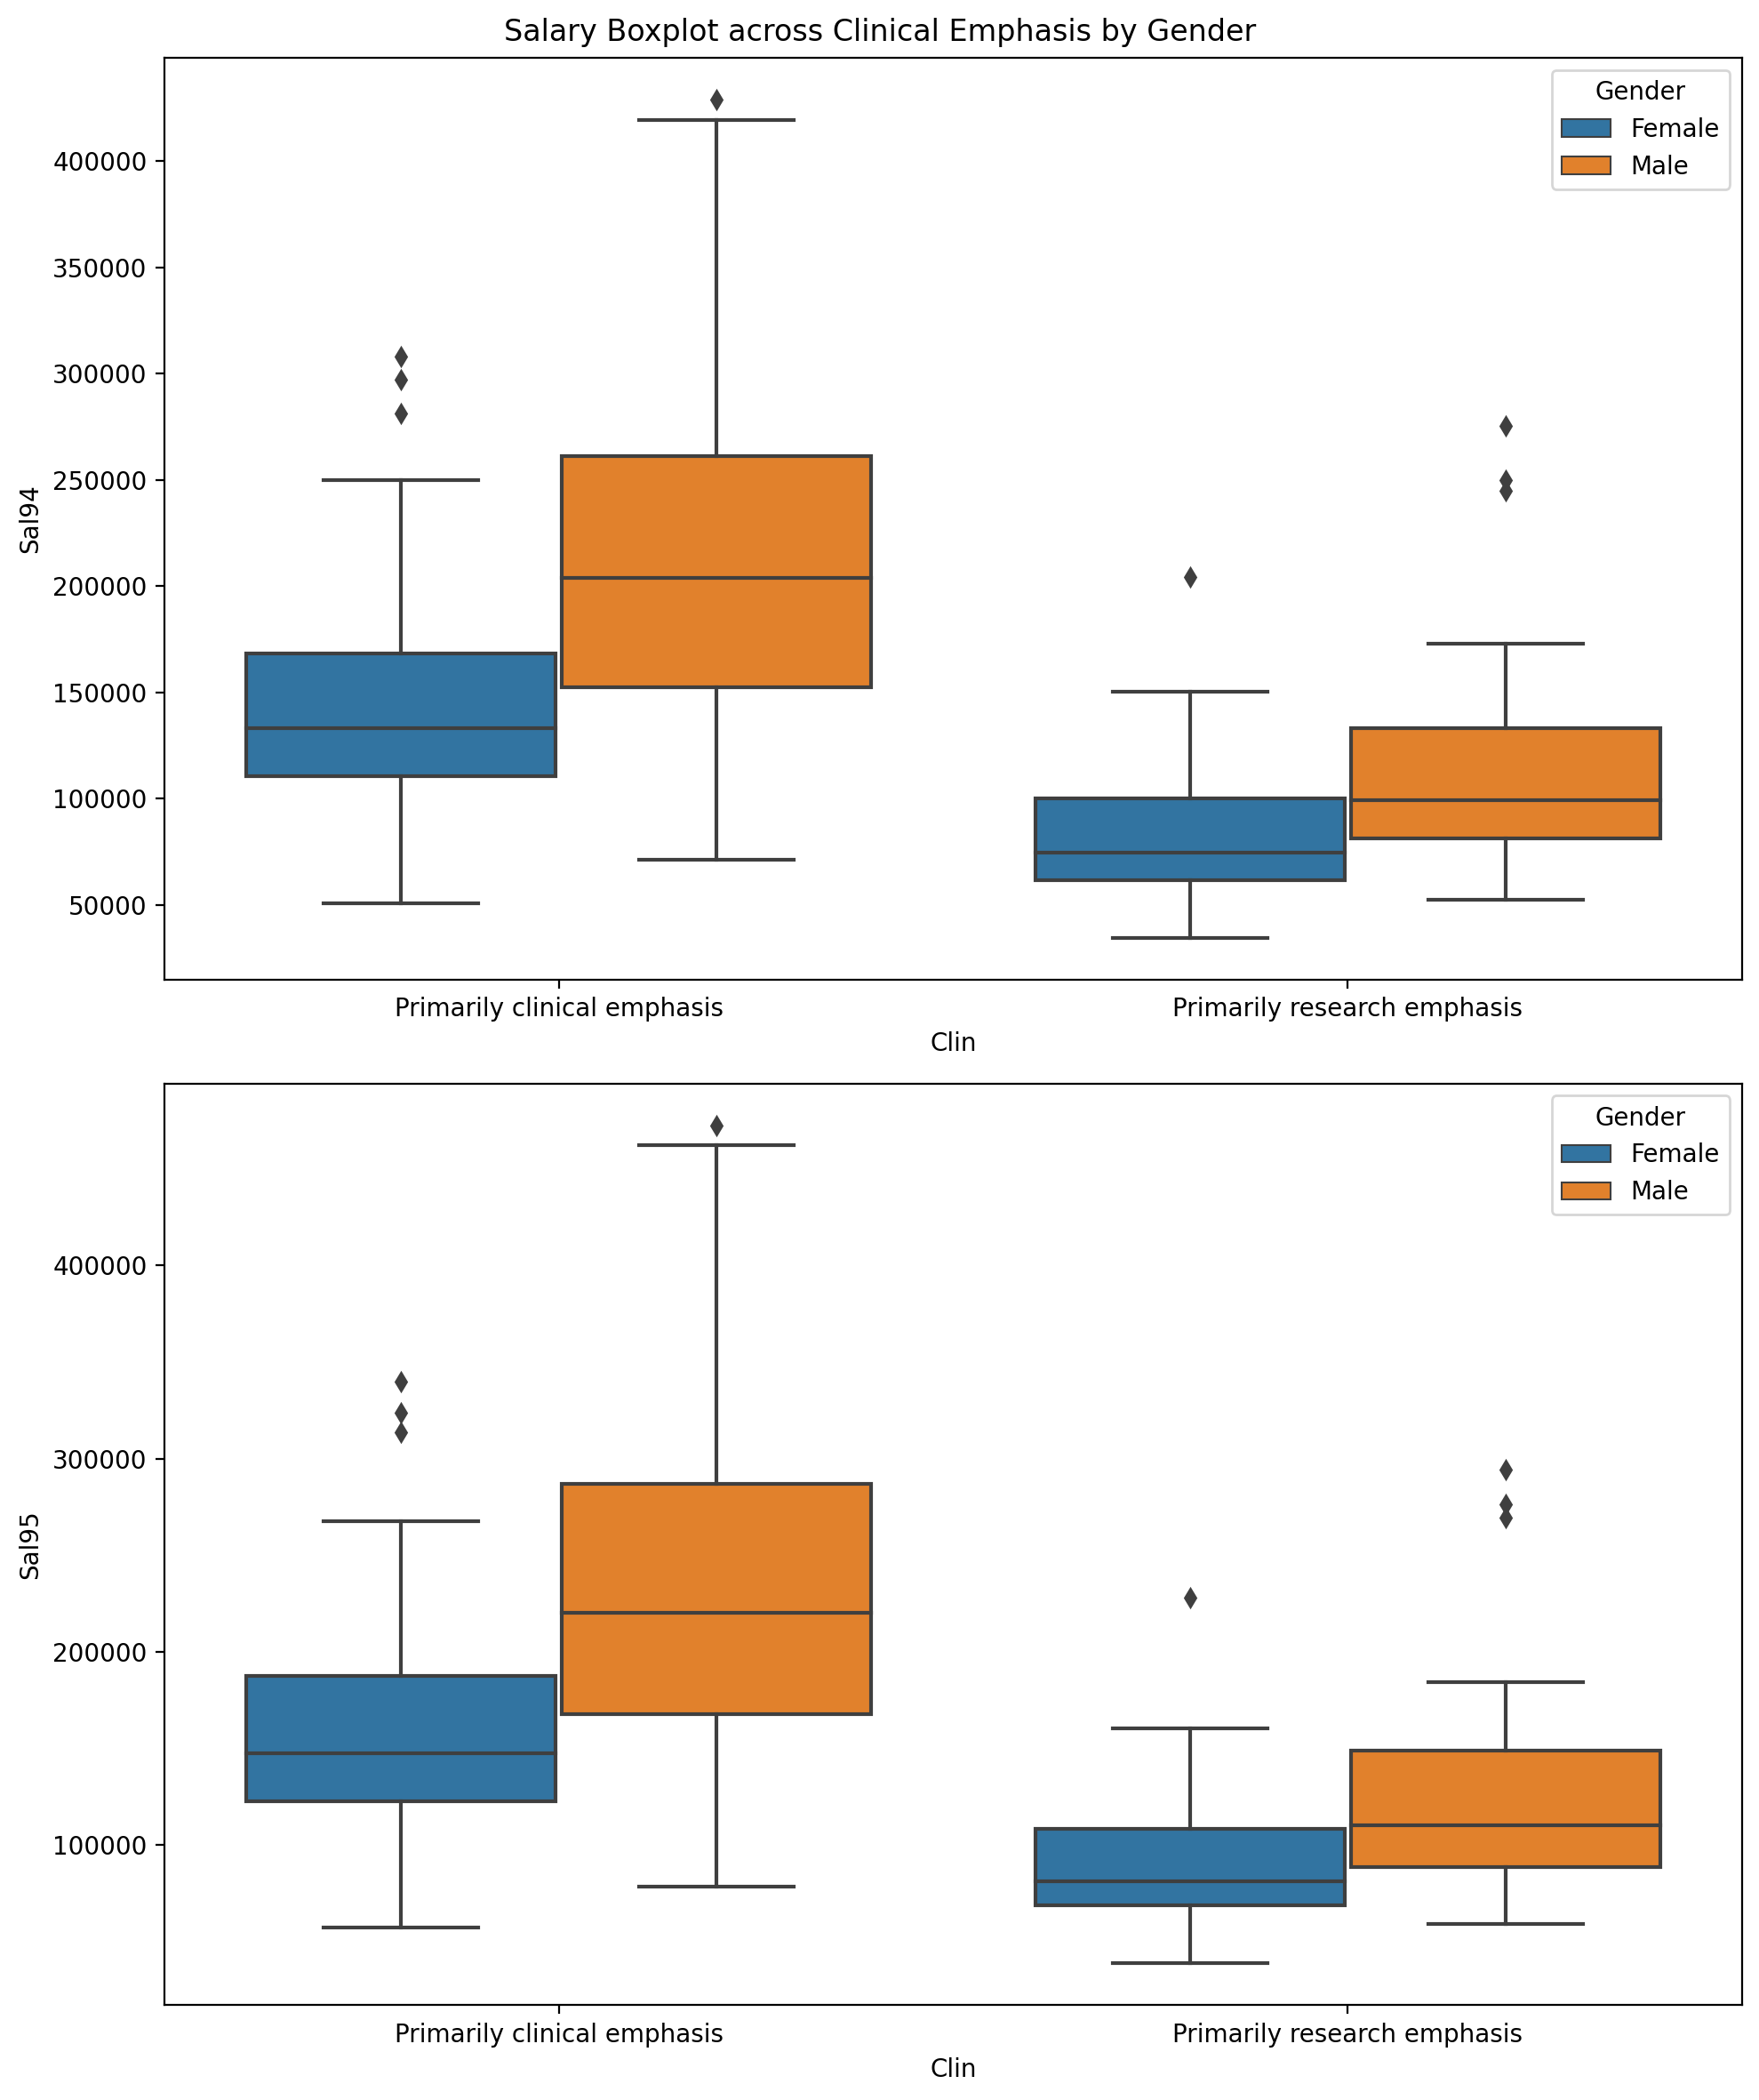

In [200]:
f, ax = plt.subplots(2,1, figsize=(10,12), dpi=200)
sns.boxplot(data=df, x='Clin', y='Sal94', hue='Gender', ax=ax[0])
sns.boxplot(data=df, x='Clin', y='Sal95', hue='Gender', ax=ax[1])

plt.suptitle('Salary Boxplot across Clinical Emphasis by Gender')
plt.tight_layout()
plt.show();

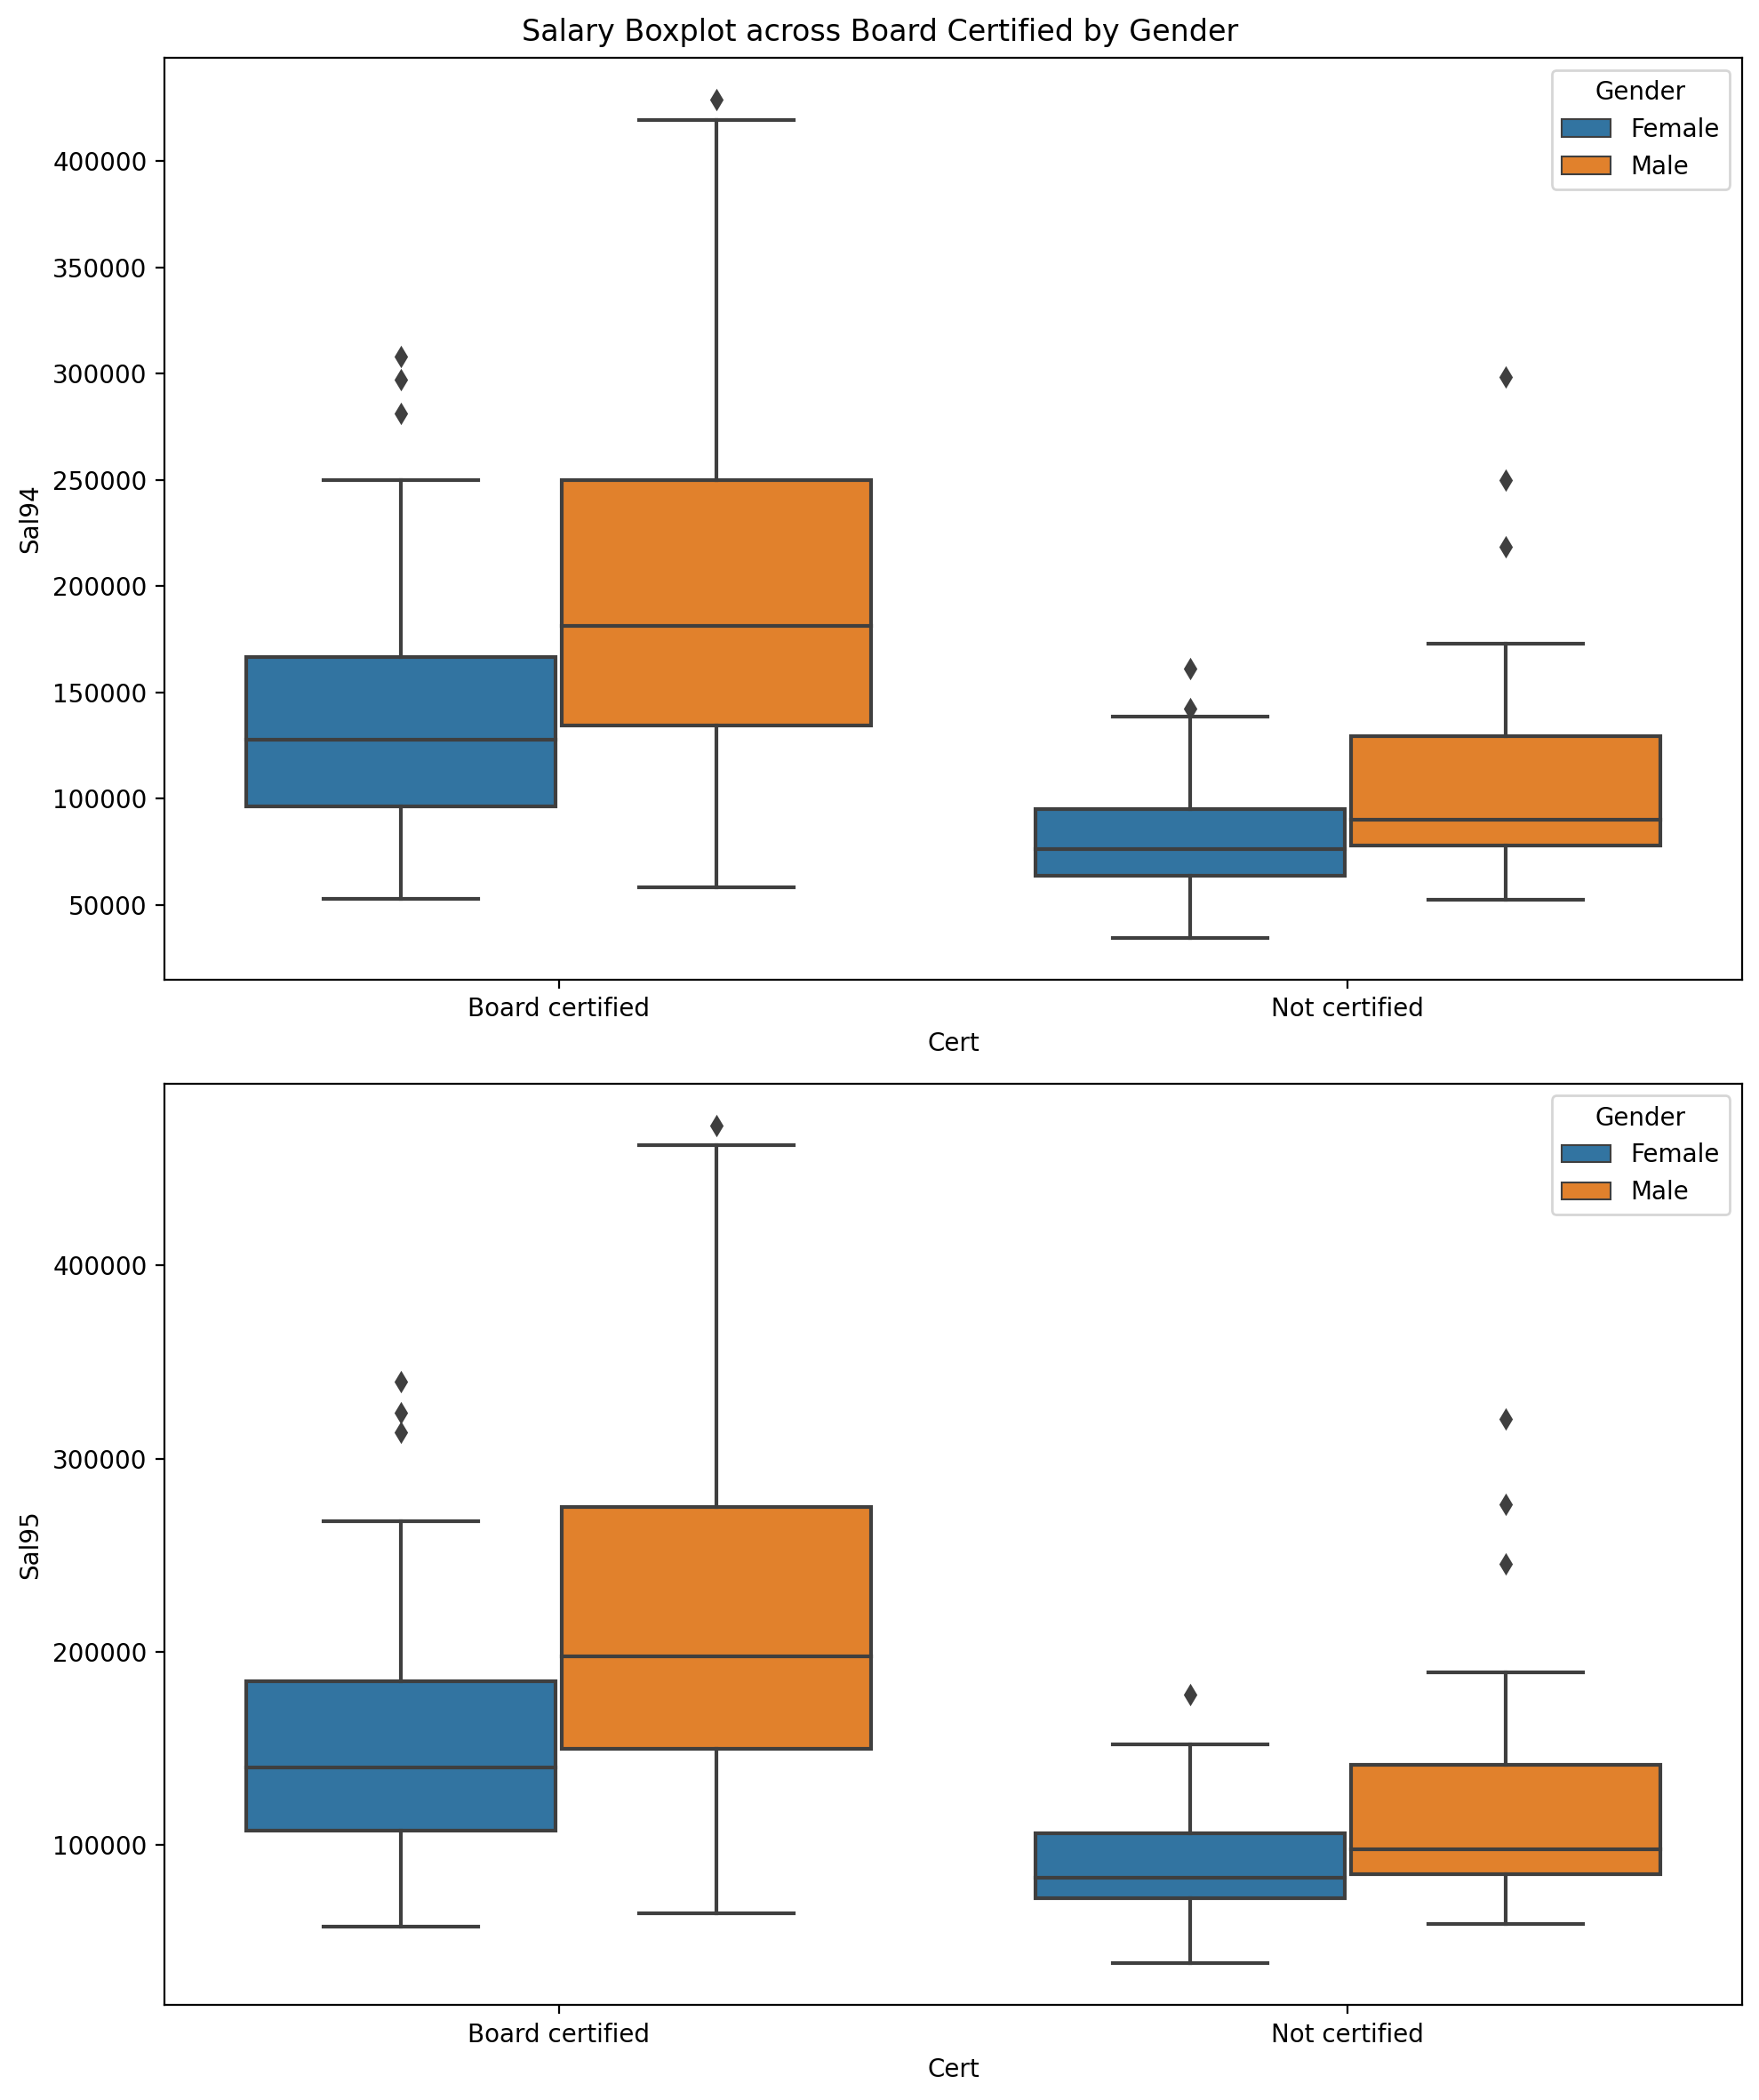

In [125]:
f, ax = plt.subplots(2,1, figsize=(10,12), dpi=200)
sns.boxplot(data=df, x='Cert', y='Sal94', hue='Gender', ax=ax[0])
sns.boxplot(data=df, x='Cert', y='Sal95', hue='Gender', ax=ax[1])

plt.suptitle('Salary Boxplot across Board Certified by Gender')
plt.tight_layout()
plt.show();

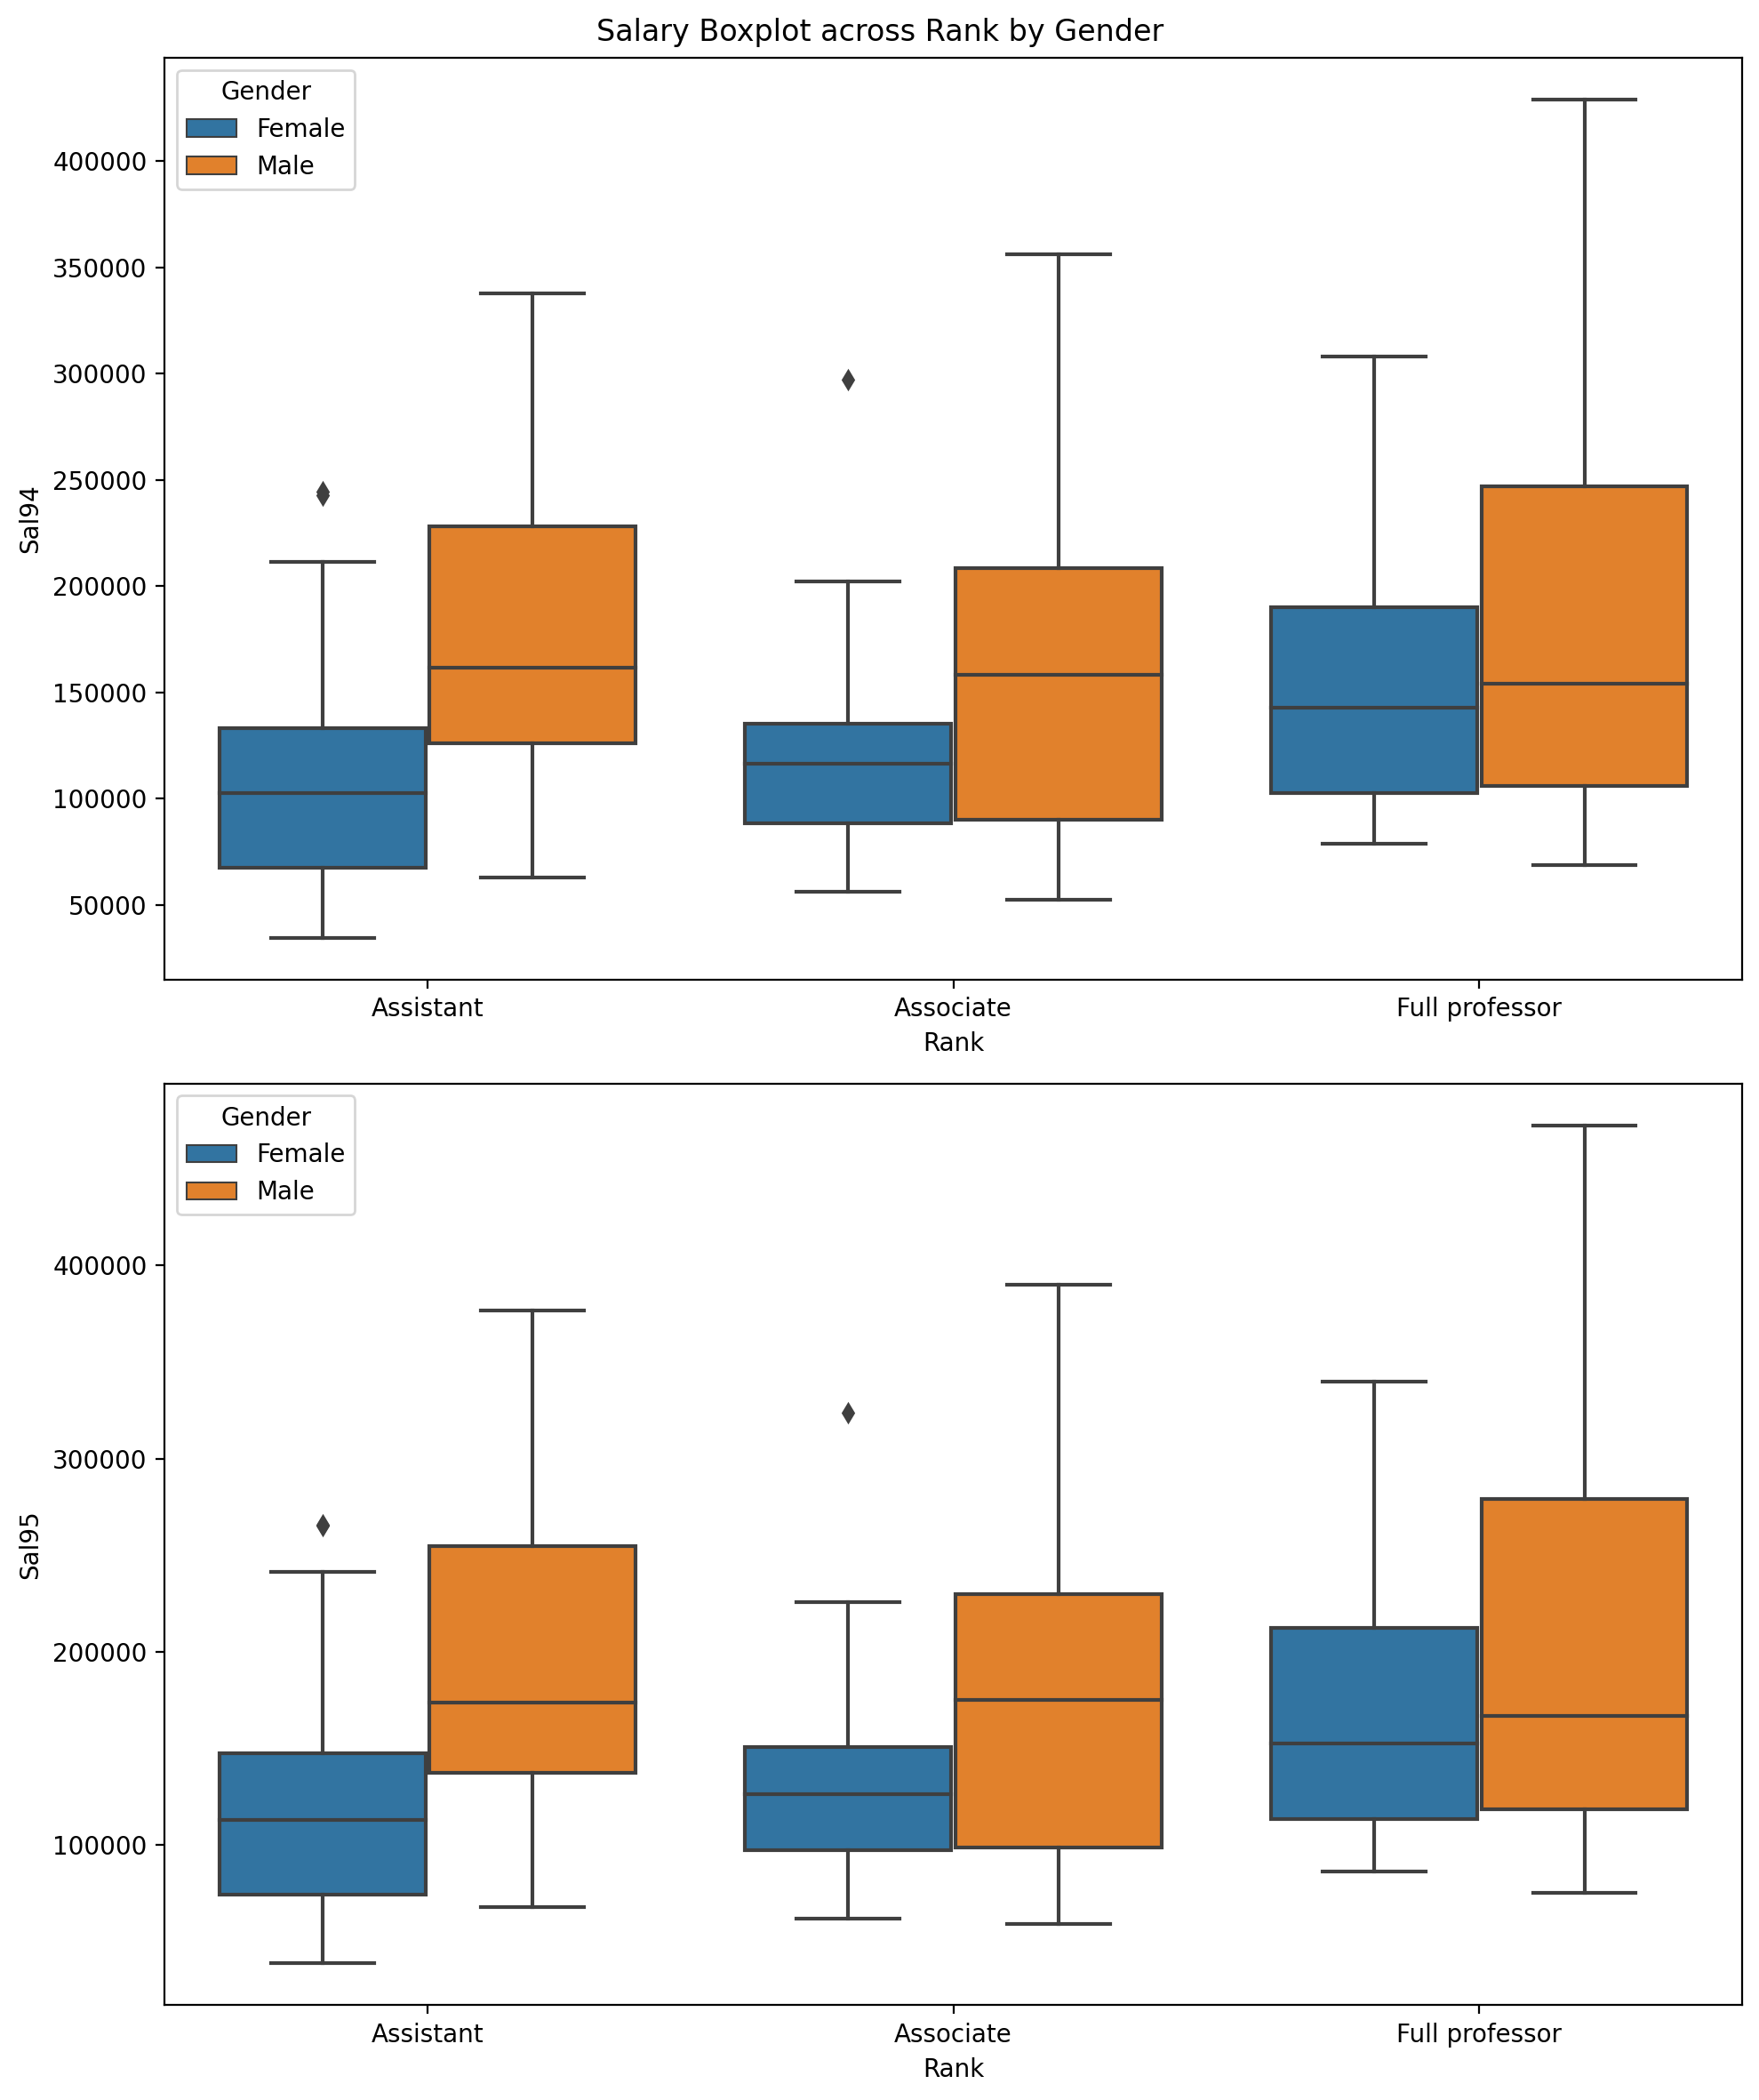

In [126]:
f, ax = plt.subplots(2,1, figsize=(10,12), dpi=200)
sns.boxplot(data=df, x='Rank', y='Sal94', hue='Gender', ax=ax[0])
sns.boxplot(data=df, x='Rank', y='Sal95', hue='Gender', ax=ax[1])

plt.suptitle('Salary Boxplot across Rank by Gender')
plt.tight_layout()
plt.show();

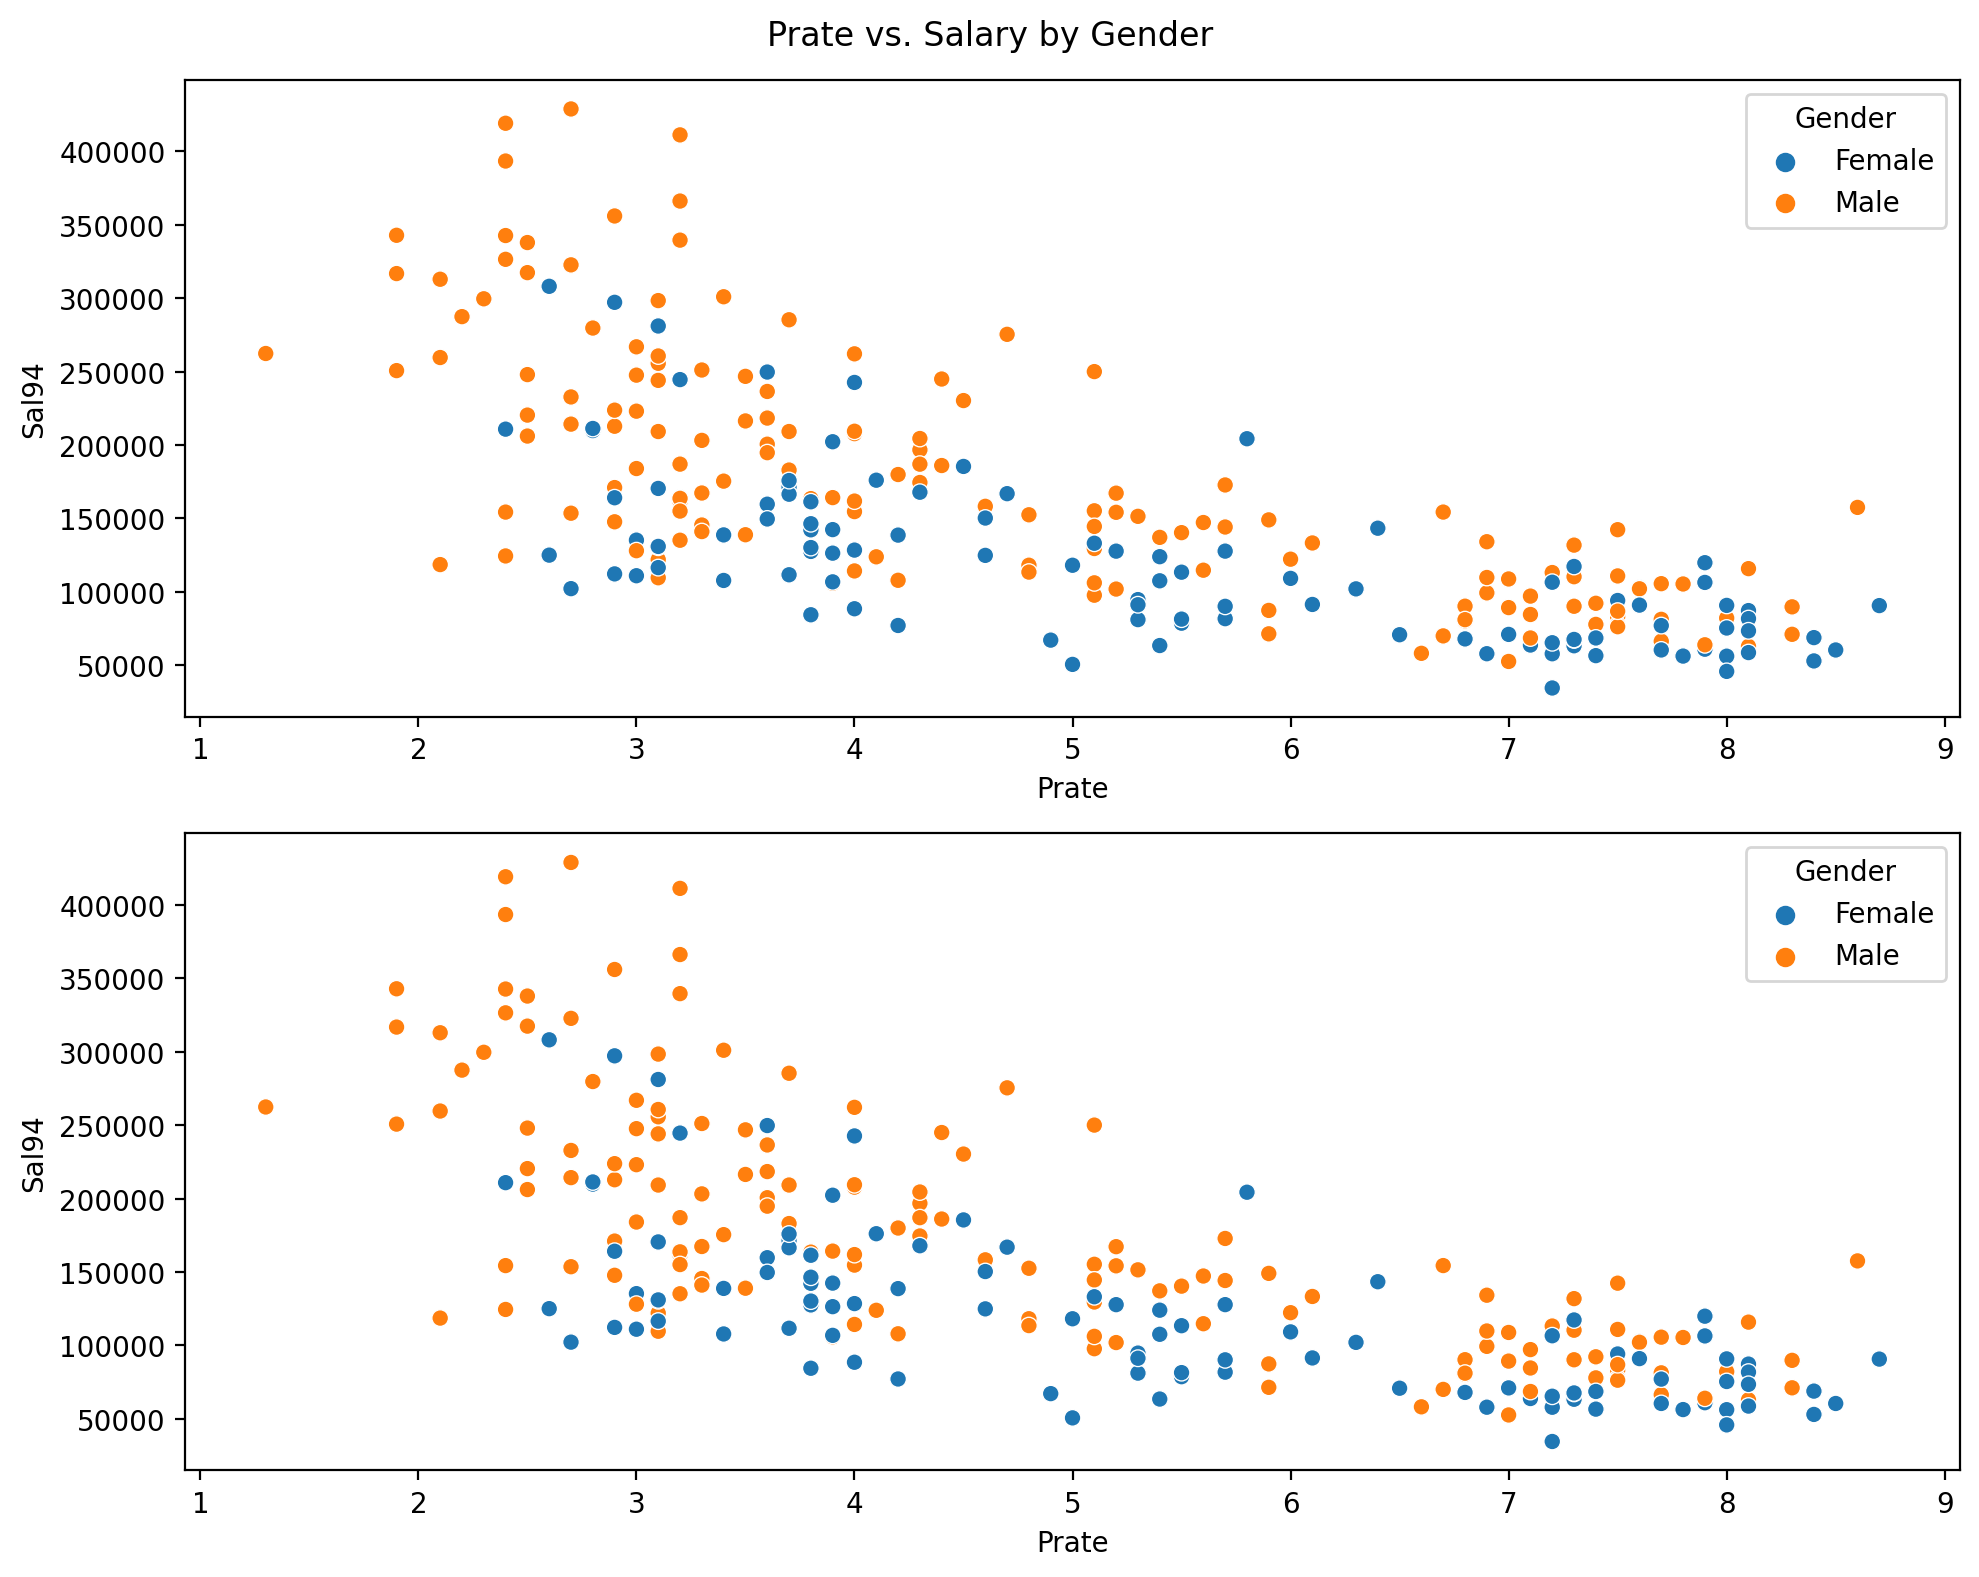

In [202]:
f, ax = plt.subplots(2,1, figsize=(10,8), dpi=200)

sns.scatterplot(data=df, x="Prate", y="Sal94", hue="Gender", ax=ax[0])
sns.scatterplot(data=df, x="Prate", y="Sal94", hue="Gender", ax=ax[1])

plt.suptitle('Prate vs. Salary by Gender')
plt.tight_layout()
plt.show();

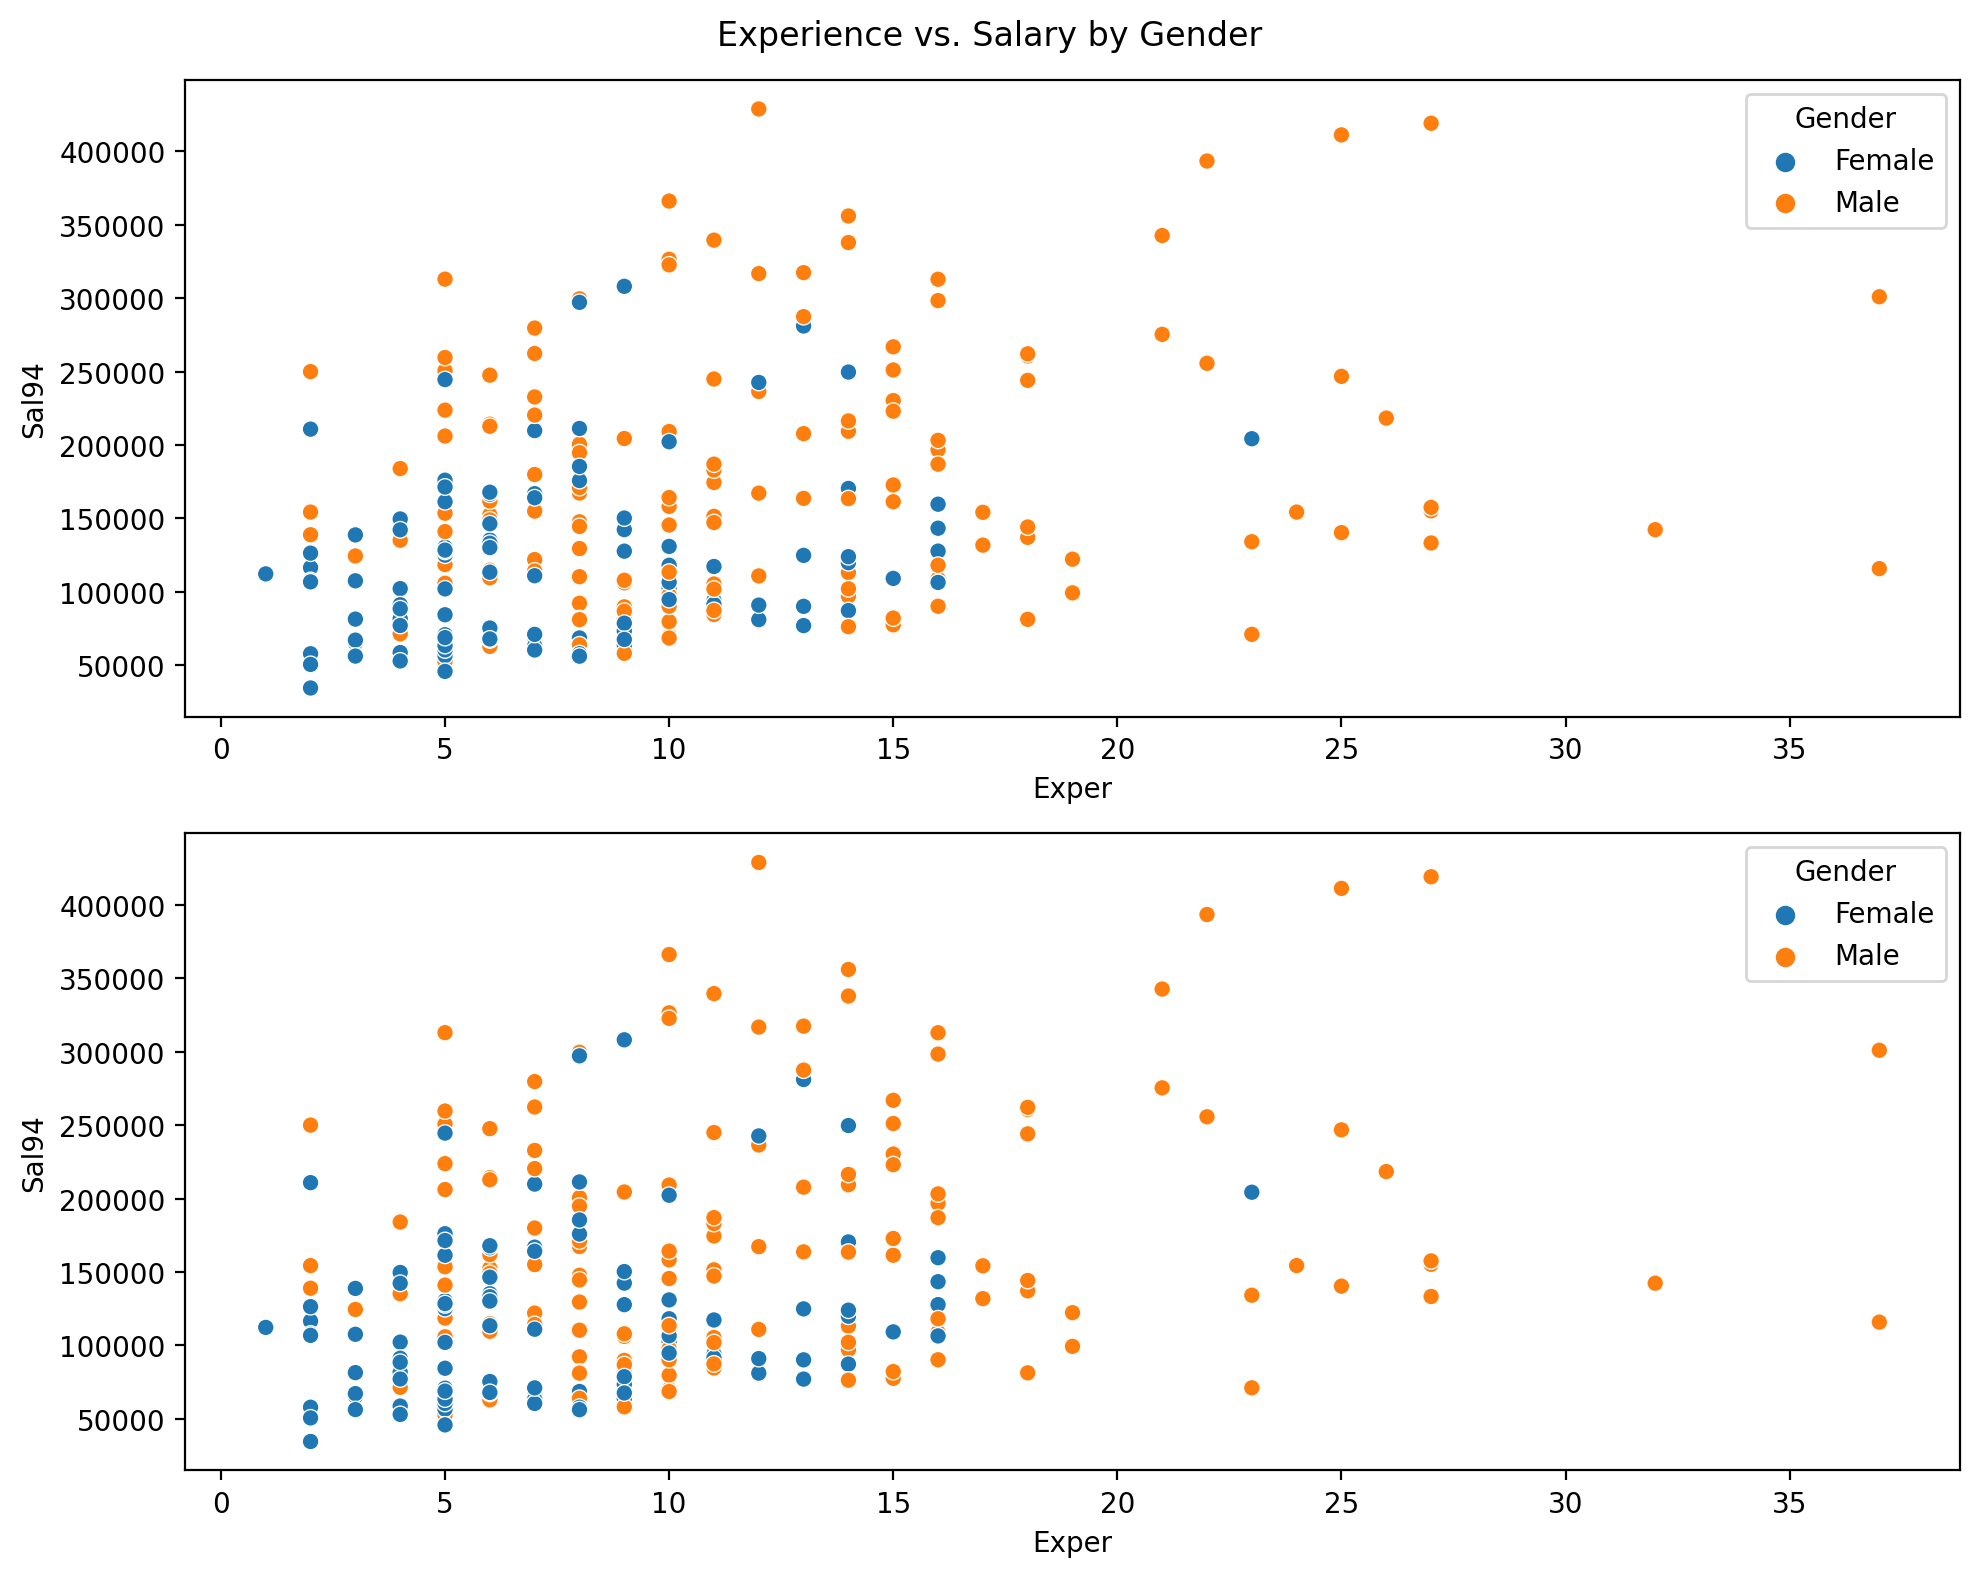

In [203]:
f, ax = plt.subplots(2,1, figsize=(10,8), dpi=200)

sns.scatterplot(data=df, x="Exper", y="Sal94", hue="Gender", ax=ax[0])
sns.scatterplot(data=df, x="Exper", y="Sal94", hue="Gender", ax=ax[1])

plt.suptitle('Experience vs. Salary by Gender')
plt.tight_layout()
plt.show();

## Salary Increase

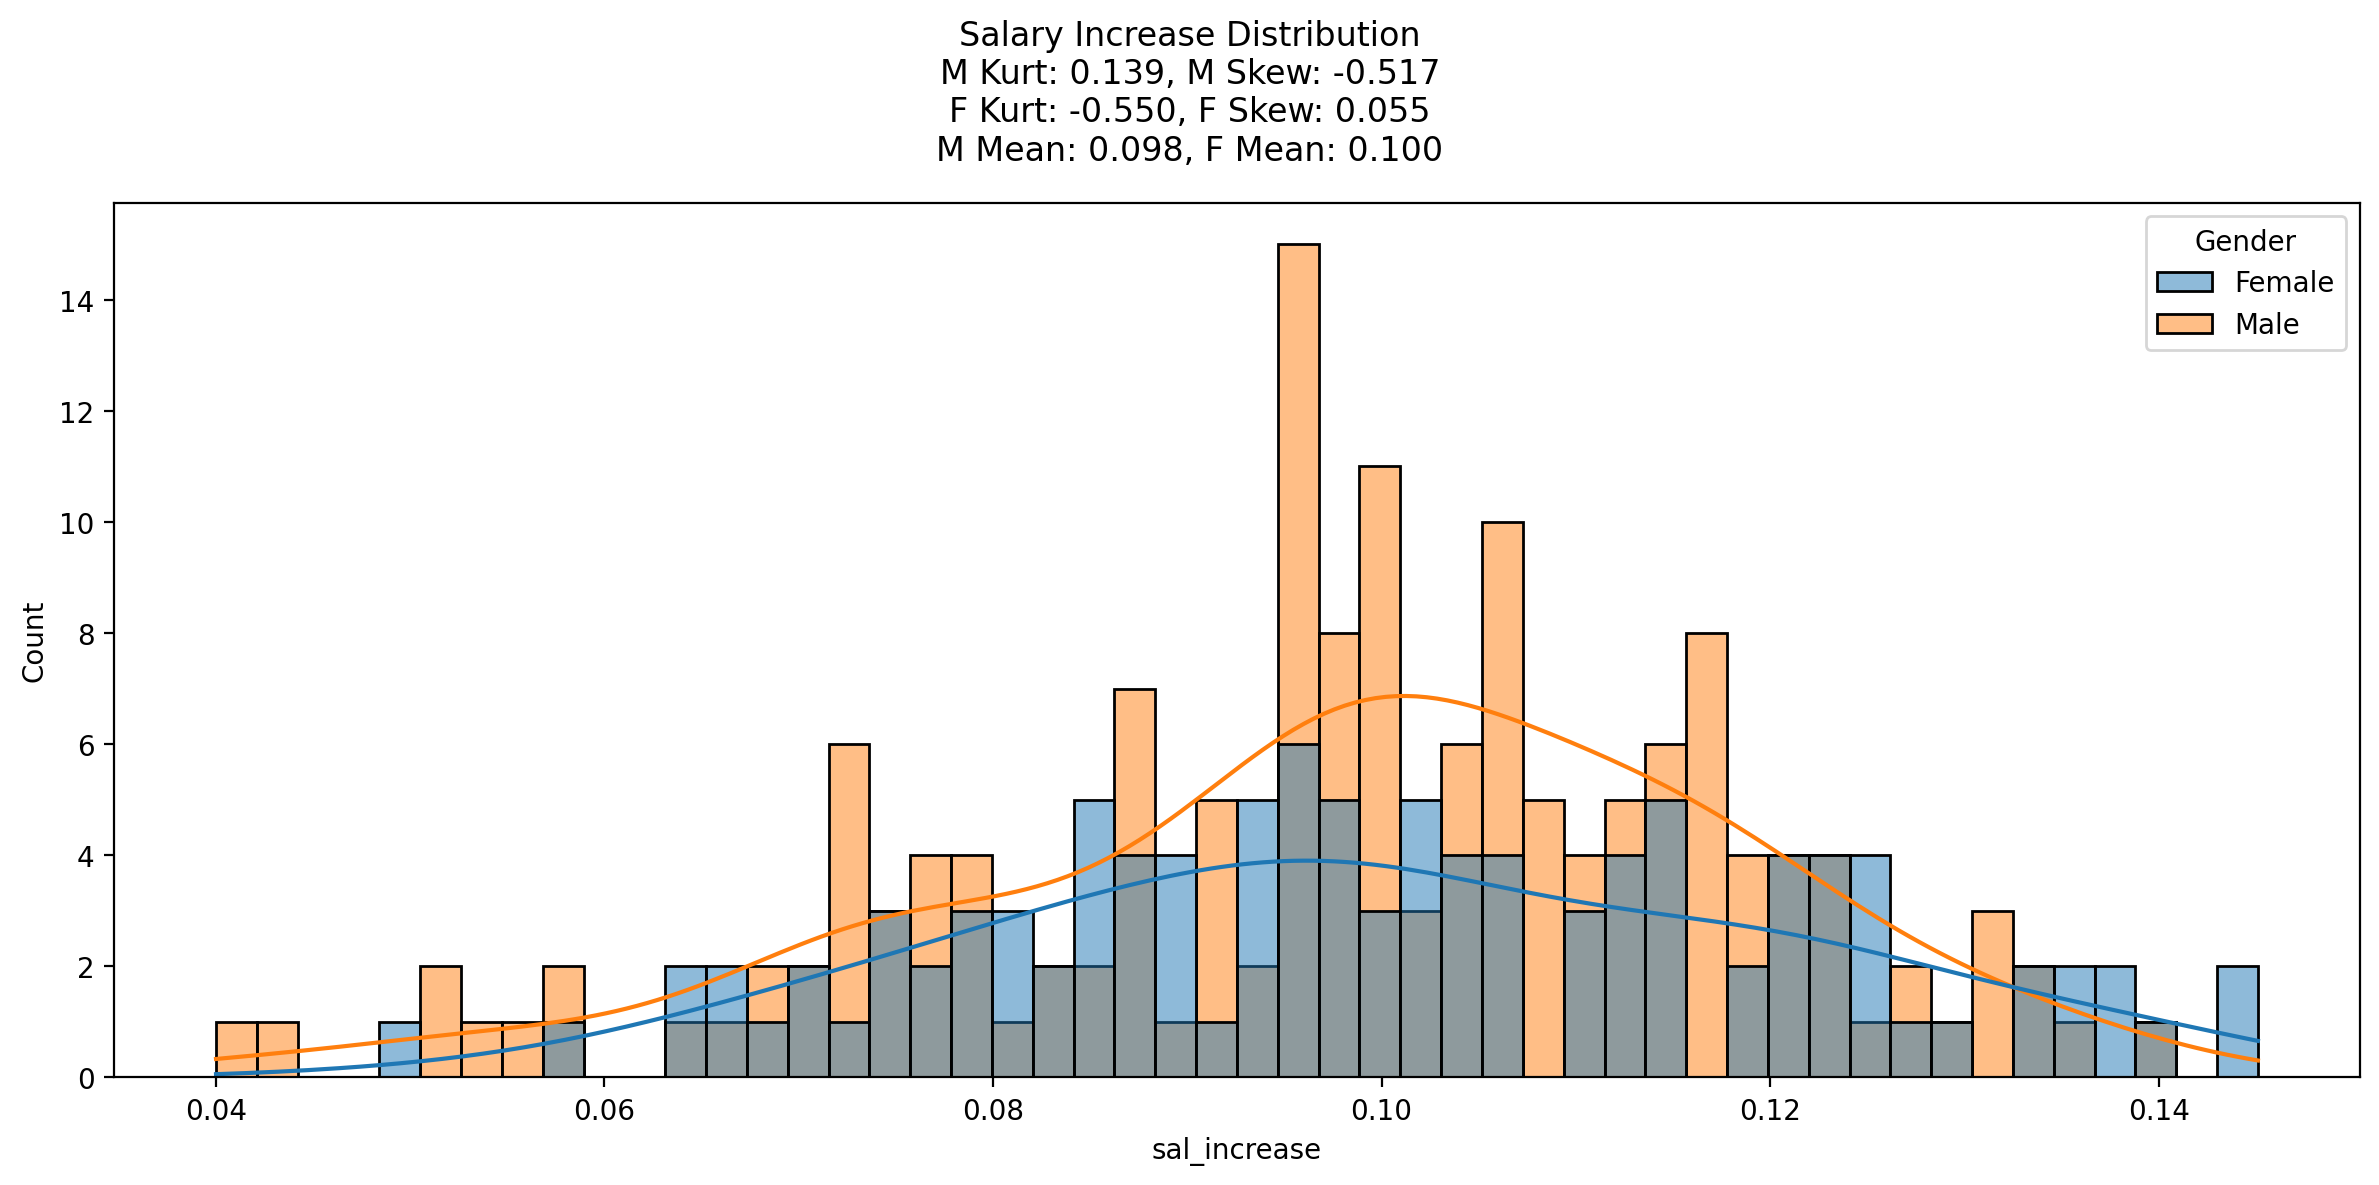

In [207]:
f, ax = plt.subplots(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='sal_increase', hue='Gender', kde=True, ax=ax, bins=50)

male_kurt = df[df.Gender == 'Male'].sal_increase.kurt()
male_skew = df[df.Gender == 'Male'].sal_increase.skew()
female_kurt = df[df.Gender == 'Female'].sal_increase.kurt()
female_skew = df[df.Gender == 'Female'].sal_increase.skew()

male_mean = df[df.Gender == 'Male'].sal_increase.mean()
female_mean = df[df.Gender == 'Female'].sal_increase.mean()


title_string = (
    "Salary Increase Distribution\n"
    f"M Kurt: {male_kurt:.3f}, M Skew: {male_skew:.3f}\n"
    f"F Kurt: {female_kurt:.3f}, F Skew: {female_skew:.3f}\n"
    f"M Mean: {male_mean:.3f}, F Mean: {female_mean:.3f}"
)

plt.suptitle(title_string)
plt.tight_layout()
plt.show();

Male
* Leptokurtic: heavier tails, peaked distribution
* Left-skewed: tail on negative side, more values on the positive side, mean is dragged down by negative outliers

Female
* Platykurtic: thin tails, flat distribution
* Right-skewed: tail on positive side, more values on the negative side, mean is propped up by positive outliers

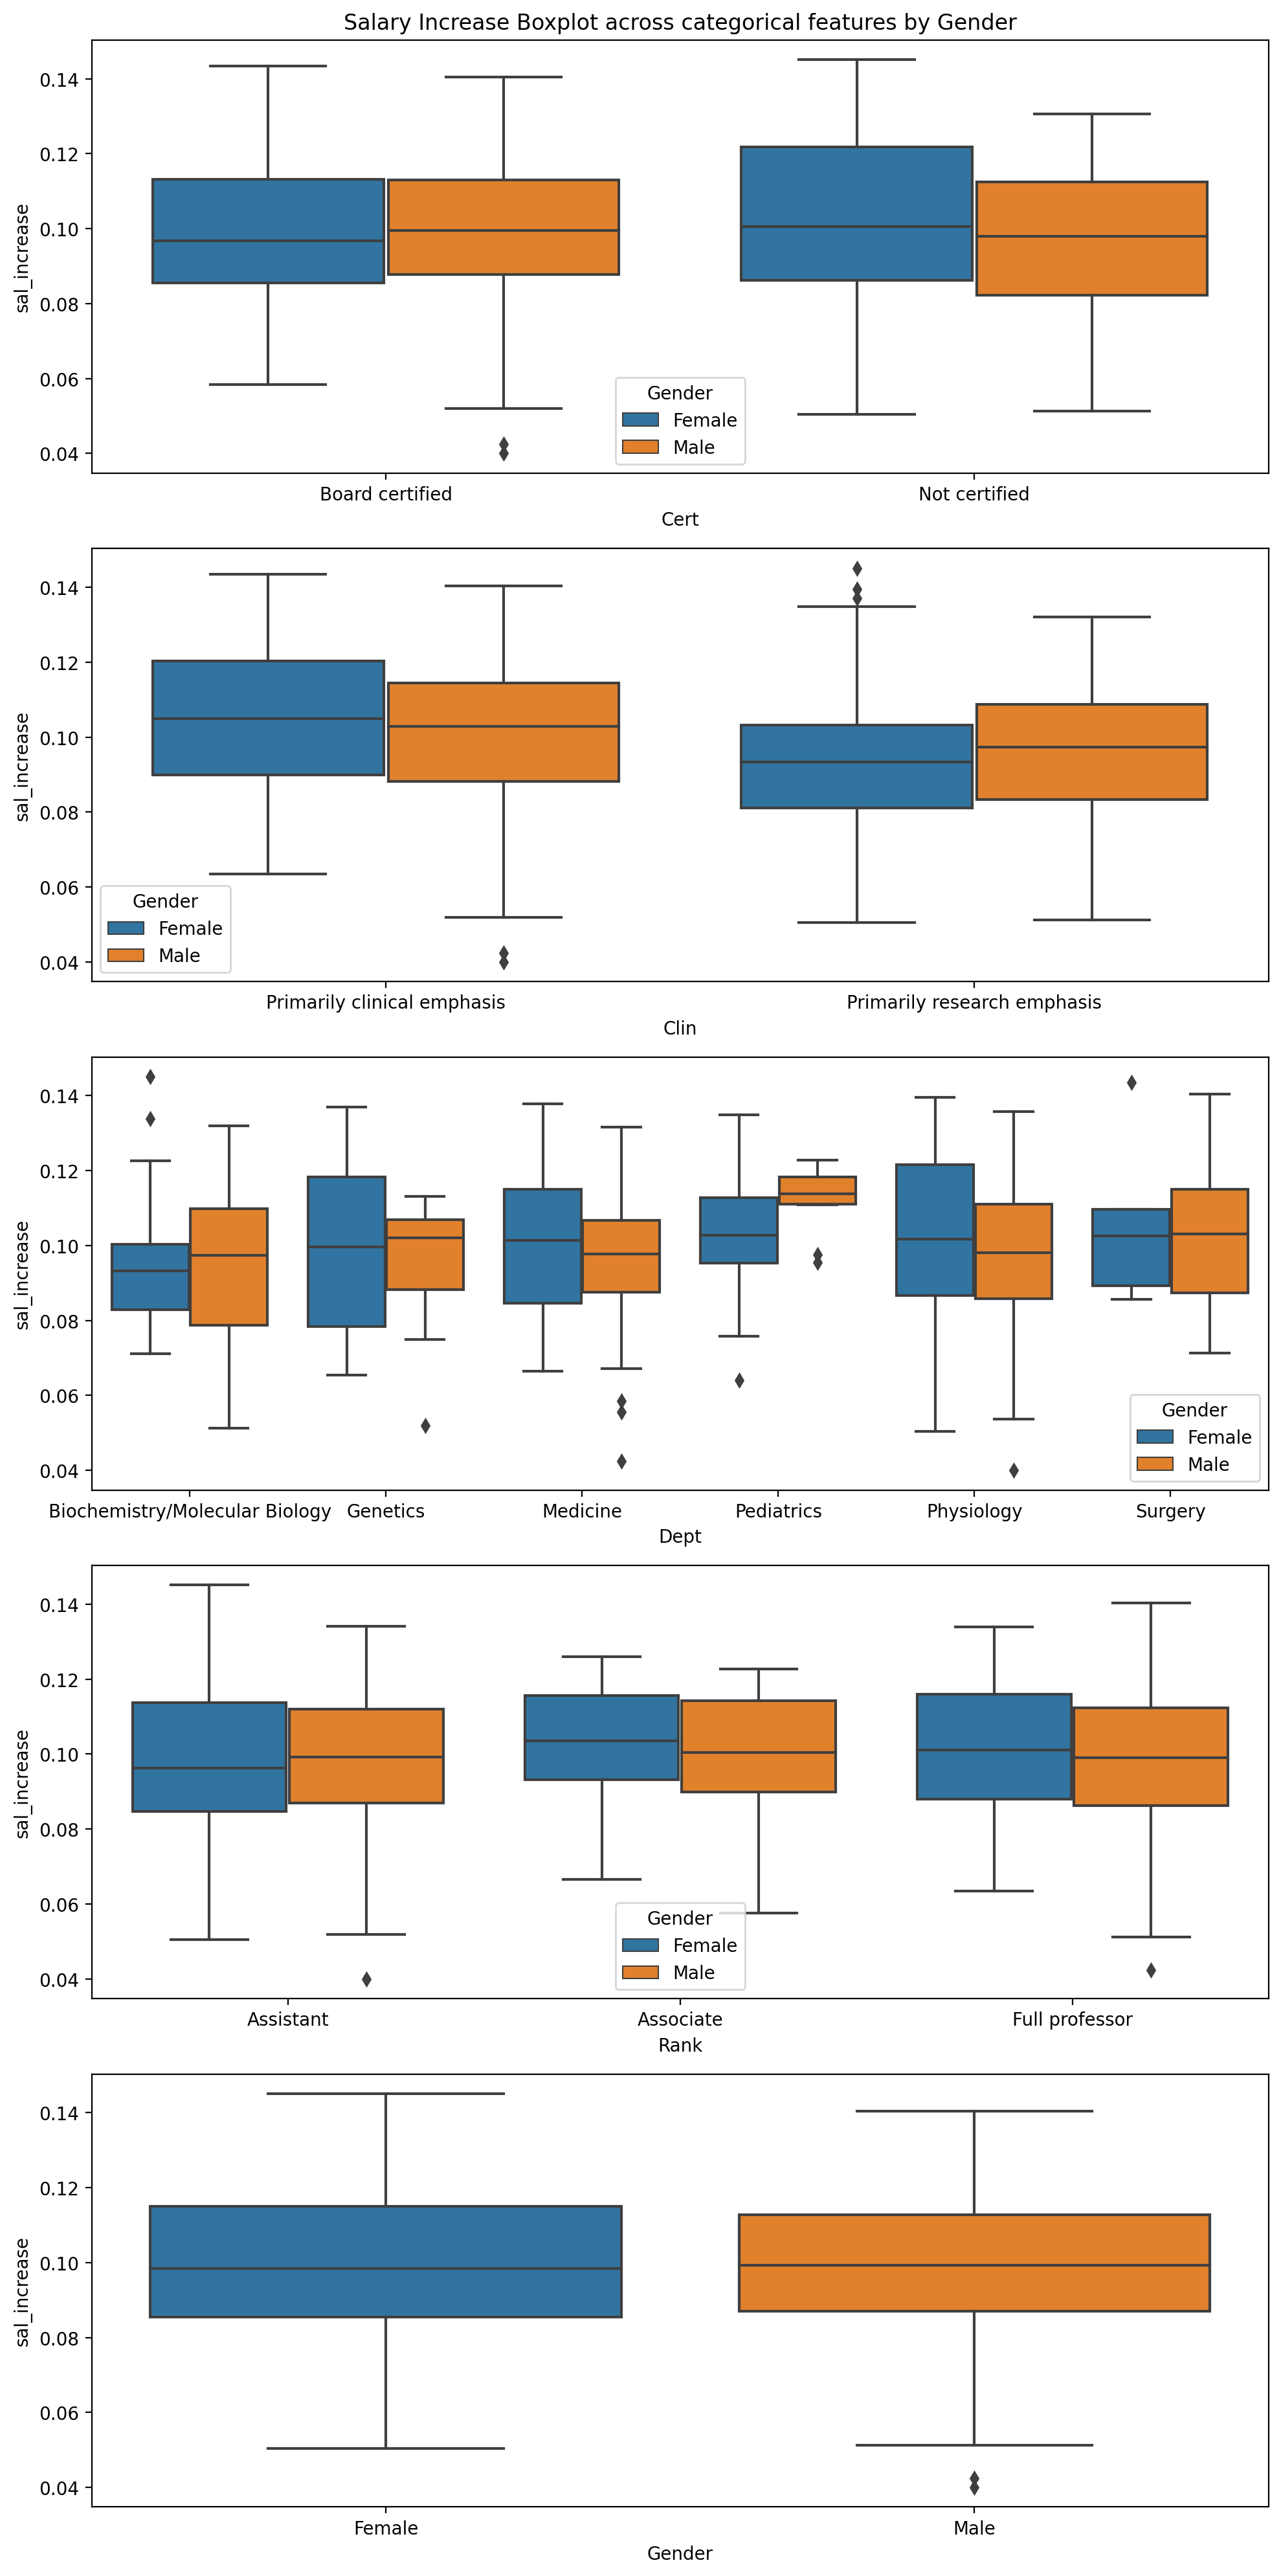

In [208]:
categorical_vars = list(set(df.columns) - set(df._get_numeric_data().columns))

f, ax = plt.subplots(len(categorical_vars),1, figsize=(10,20), dpi=200)

for i in range(len(categorical_vars)):
    c = categorical_vars[i]
    if c == 'Gender':
        sns.boxplot(data=df, x=c, y='sal_increase', ax=ax[i])
    else:    
        sns.boxplot(data=df, x=c, y='sal_increase', hue='Gender', ax=ax[i])

ax[0].set_title('Salary Increase Boxplot across categorical features by Gender')
plt.tight_layout()
plt.show();

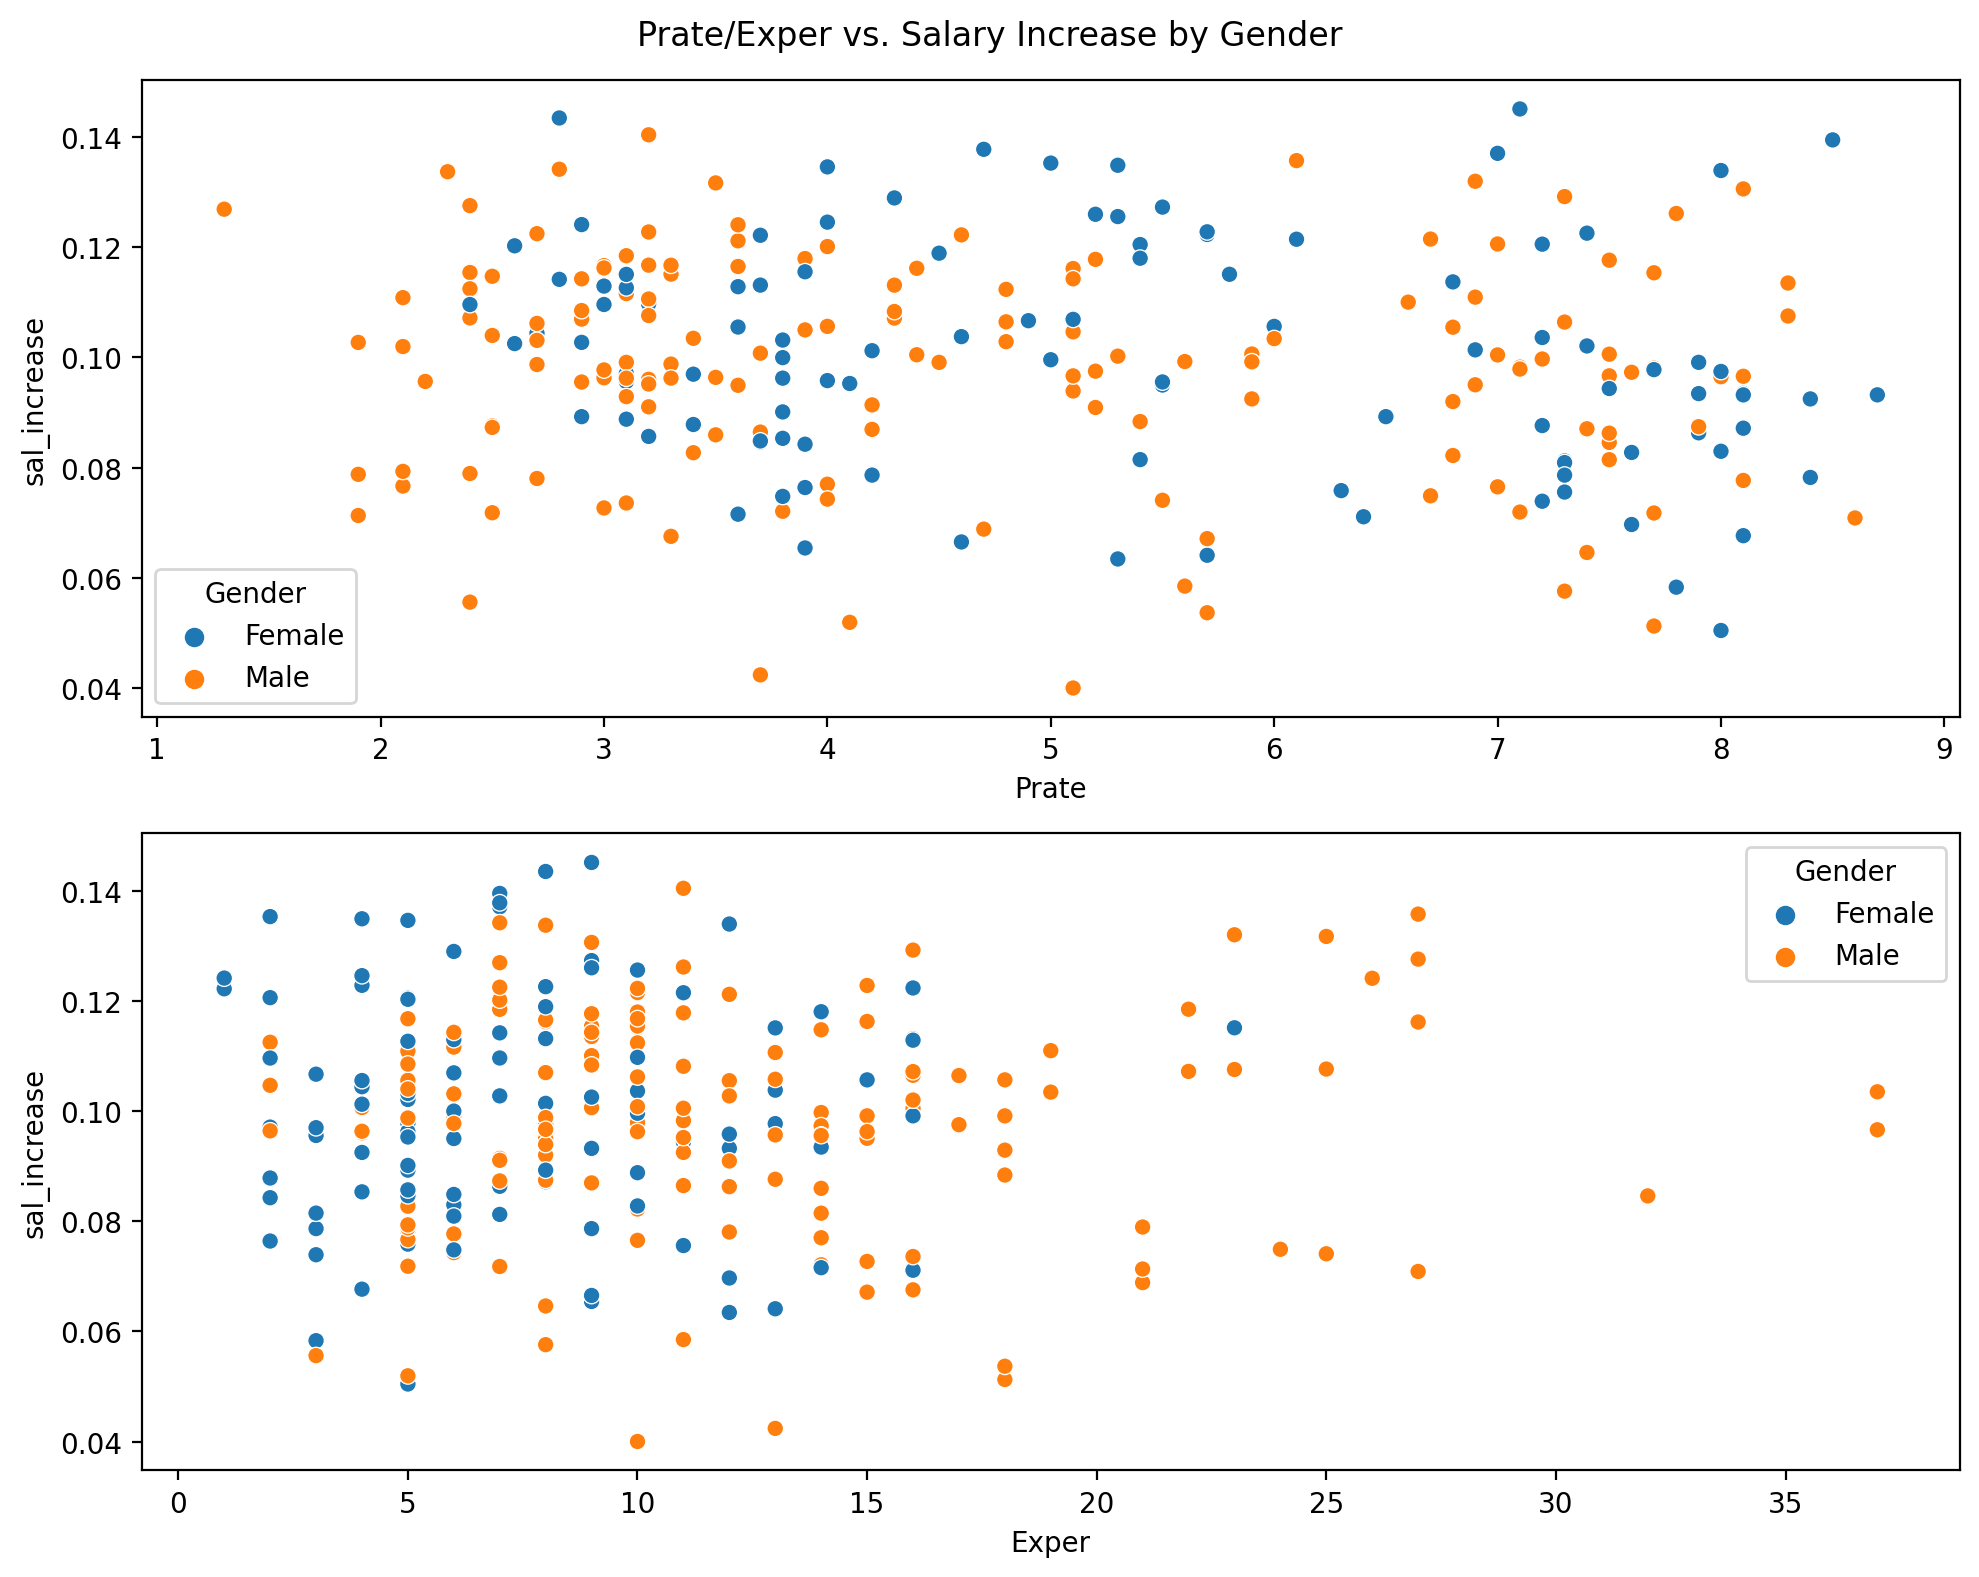

In [209]:
f, ax = plt.subplots(2,1, figsize=(10,8), dpi=200)

sns.scatterplot(data=df, x="Prate", y="sal_increase", hue="Gender", ax=ax[0])
sns.scatterplot(data=df, x="Exper", y="sal_increase", hue="Gender", ax=ax[1])

plt.suptitle('Prate/Exper vs. Salary Increase by Gender')
plt.tight_layout()
plt.show();

## Other Variables vs. Gender

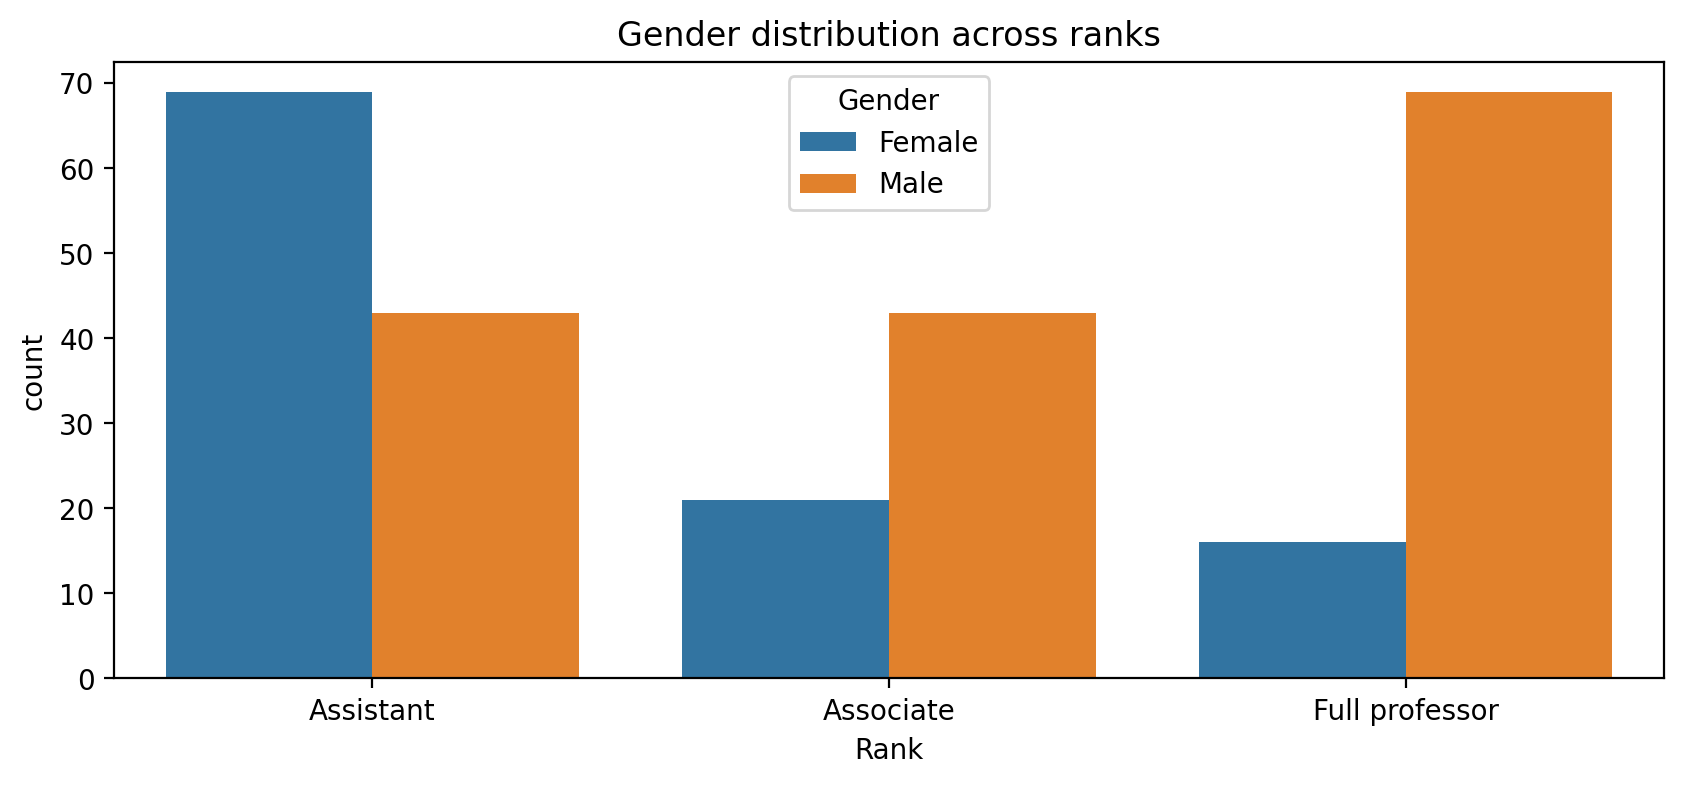

In [238]:
f, ax = plt.subplots(figsize=(10,4), dpi=200)
sns.countplot(data=df, x='Rank', hue='Gender', ax=ax)
plt.title('Gender distribution across ranks')
plt.show();

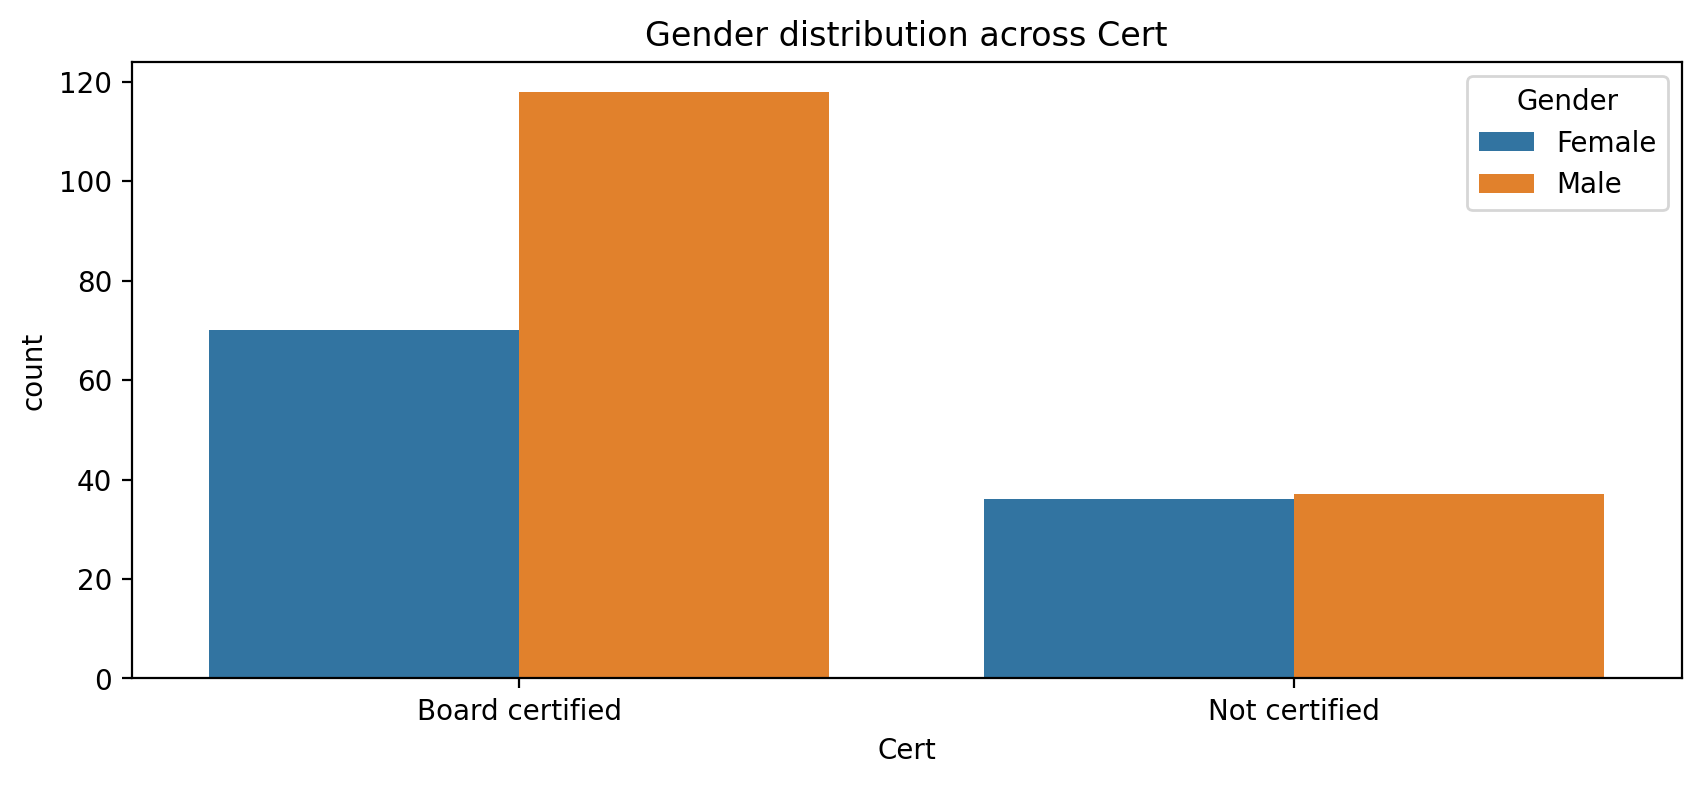

In [228]:
f, ax = plt.subplots(figsize=(10,4), dpi=200)

sns.countplot(data=df, x='Cert', hue='Gender', ax=ax)
plt.title('Gender distribution across Cert')
plt.show();

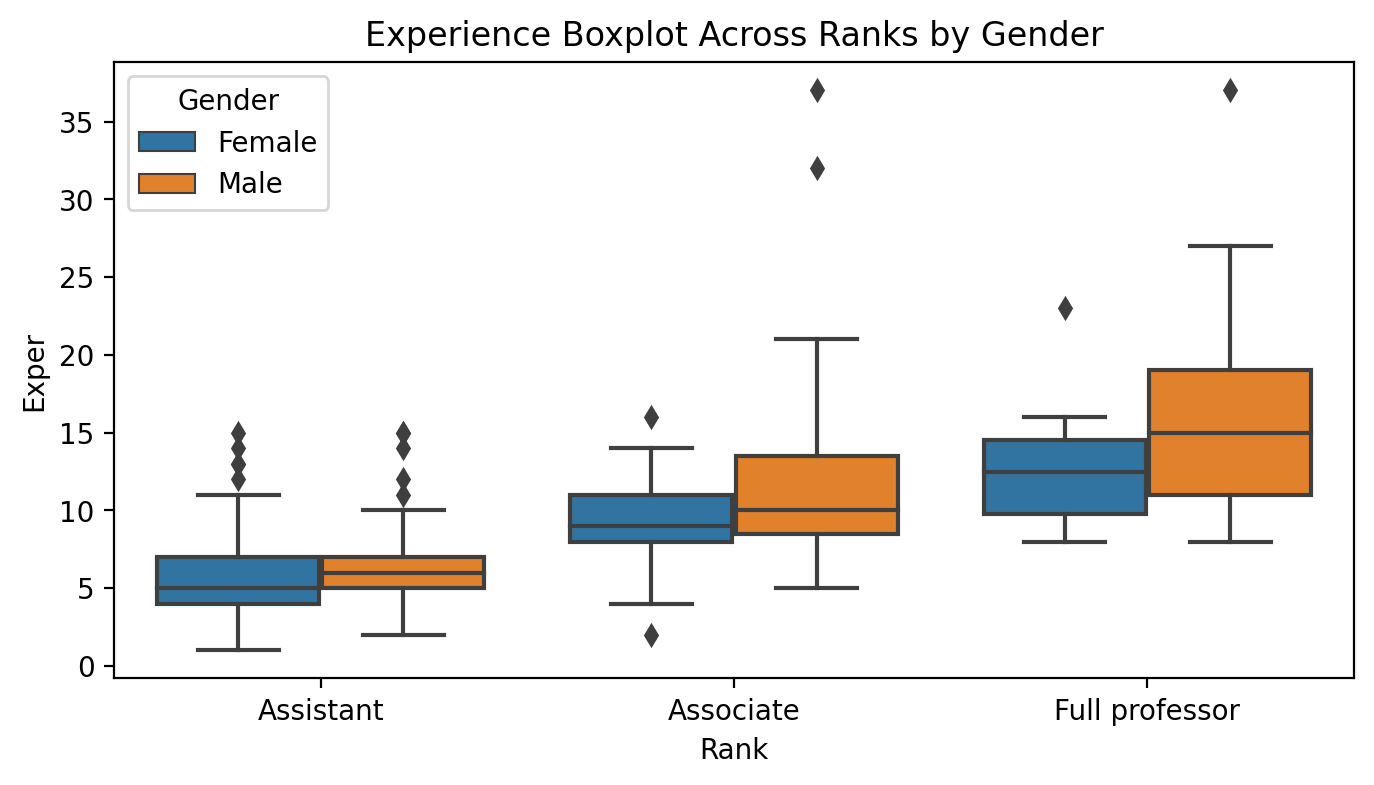

In [241]:
f, ax = plt.subplots(figsize=(8,4), dpi=200)
sns.boxplot(data=df, x='Rank', y='Exper', hue='Gender', ax=ax)
ax.set_title('Experience Boxplot Across Ranks by Gender')
plt.show();

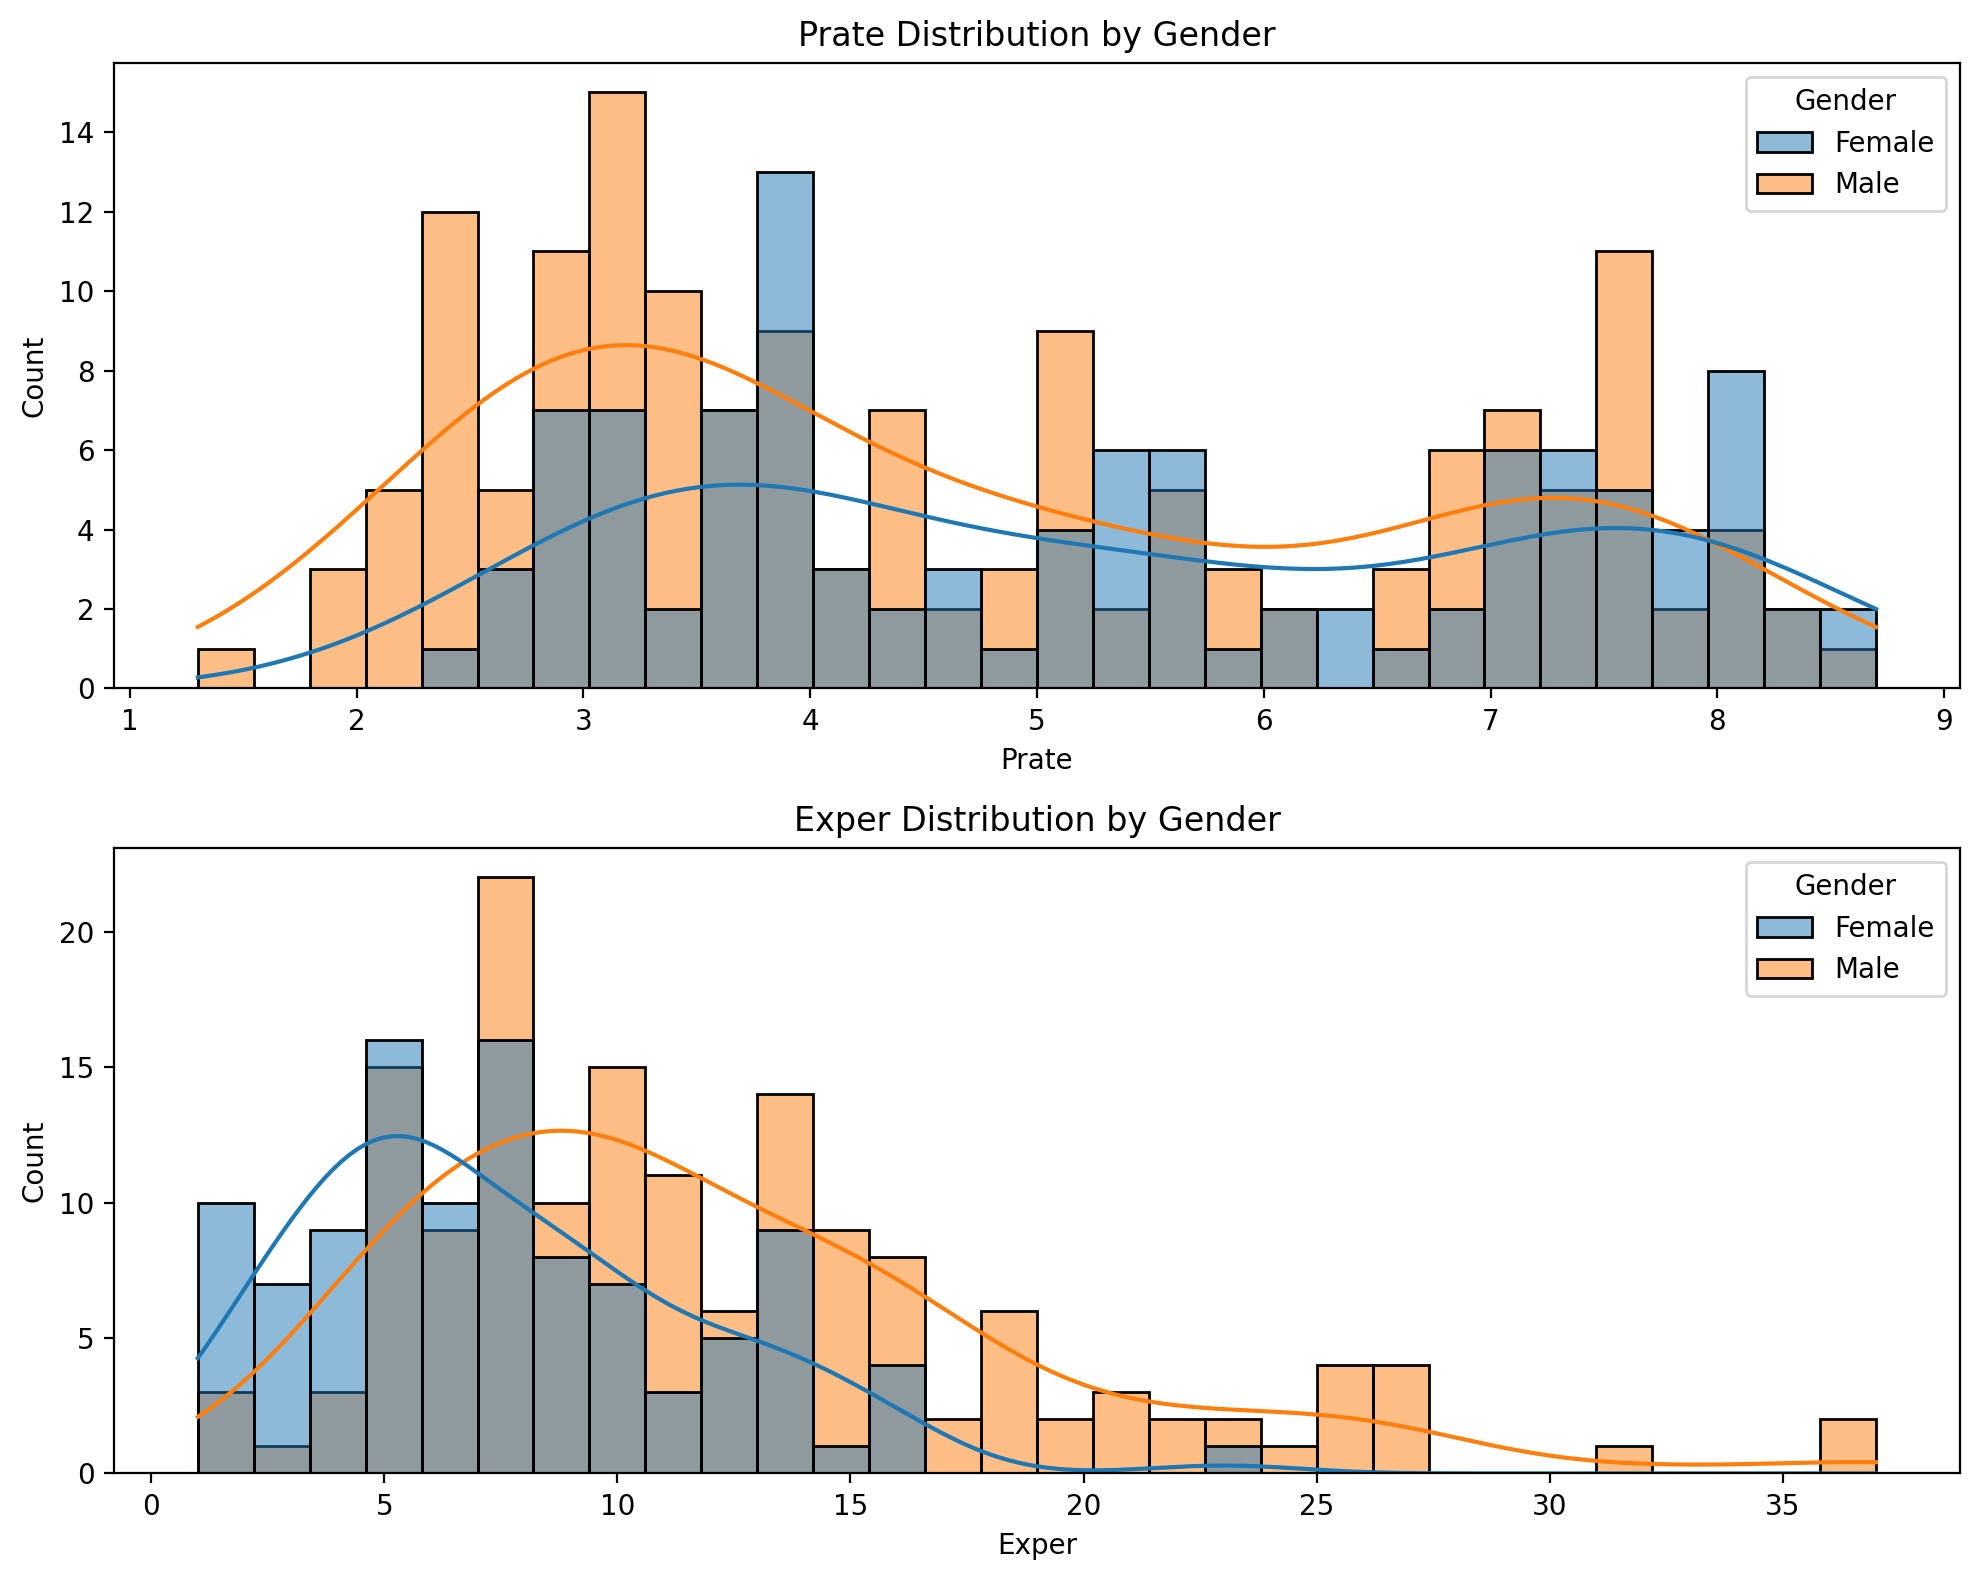

In [229]:
f, ax = plt.subplots(2,1, figsize=(10,8), dpi=200)
sns.histplot(data=df, x='Prate', hue='Gender', kde=True, ax=ax[0], bins=30)
sns.histplot(data=df, x='Exper', hue='Gender', kde=True, ax=ax[1], bins=30)

ax[0].set_title('Prate Distribution by Gender')
ax[1].set_title('Exper Distribution by Gender')
plt.tight_layout()
plt.show();

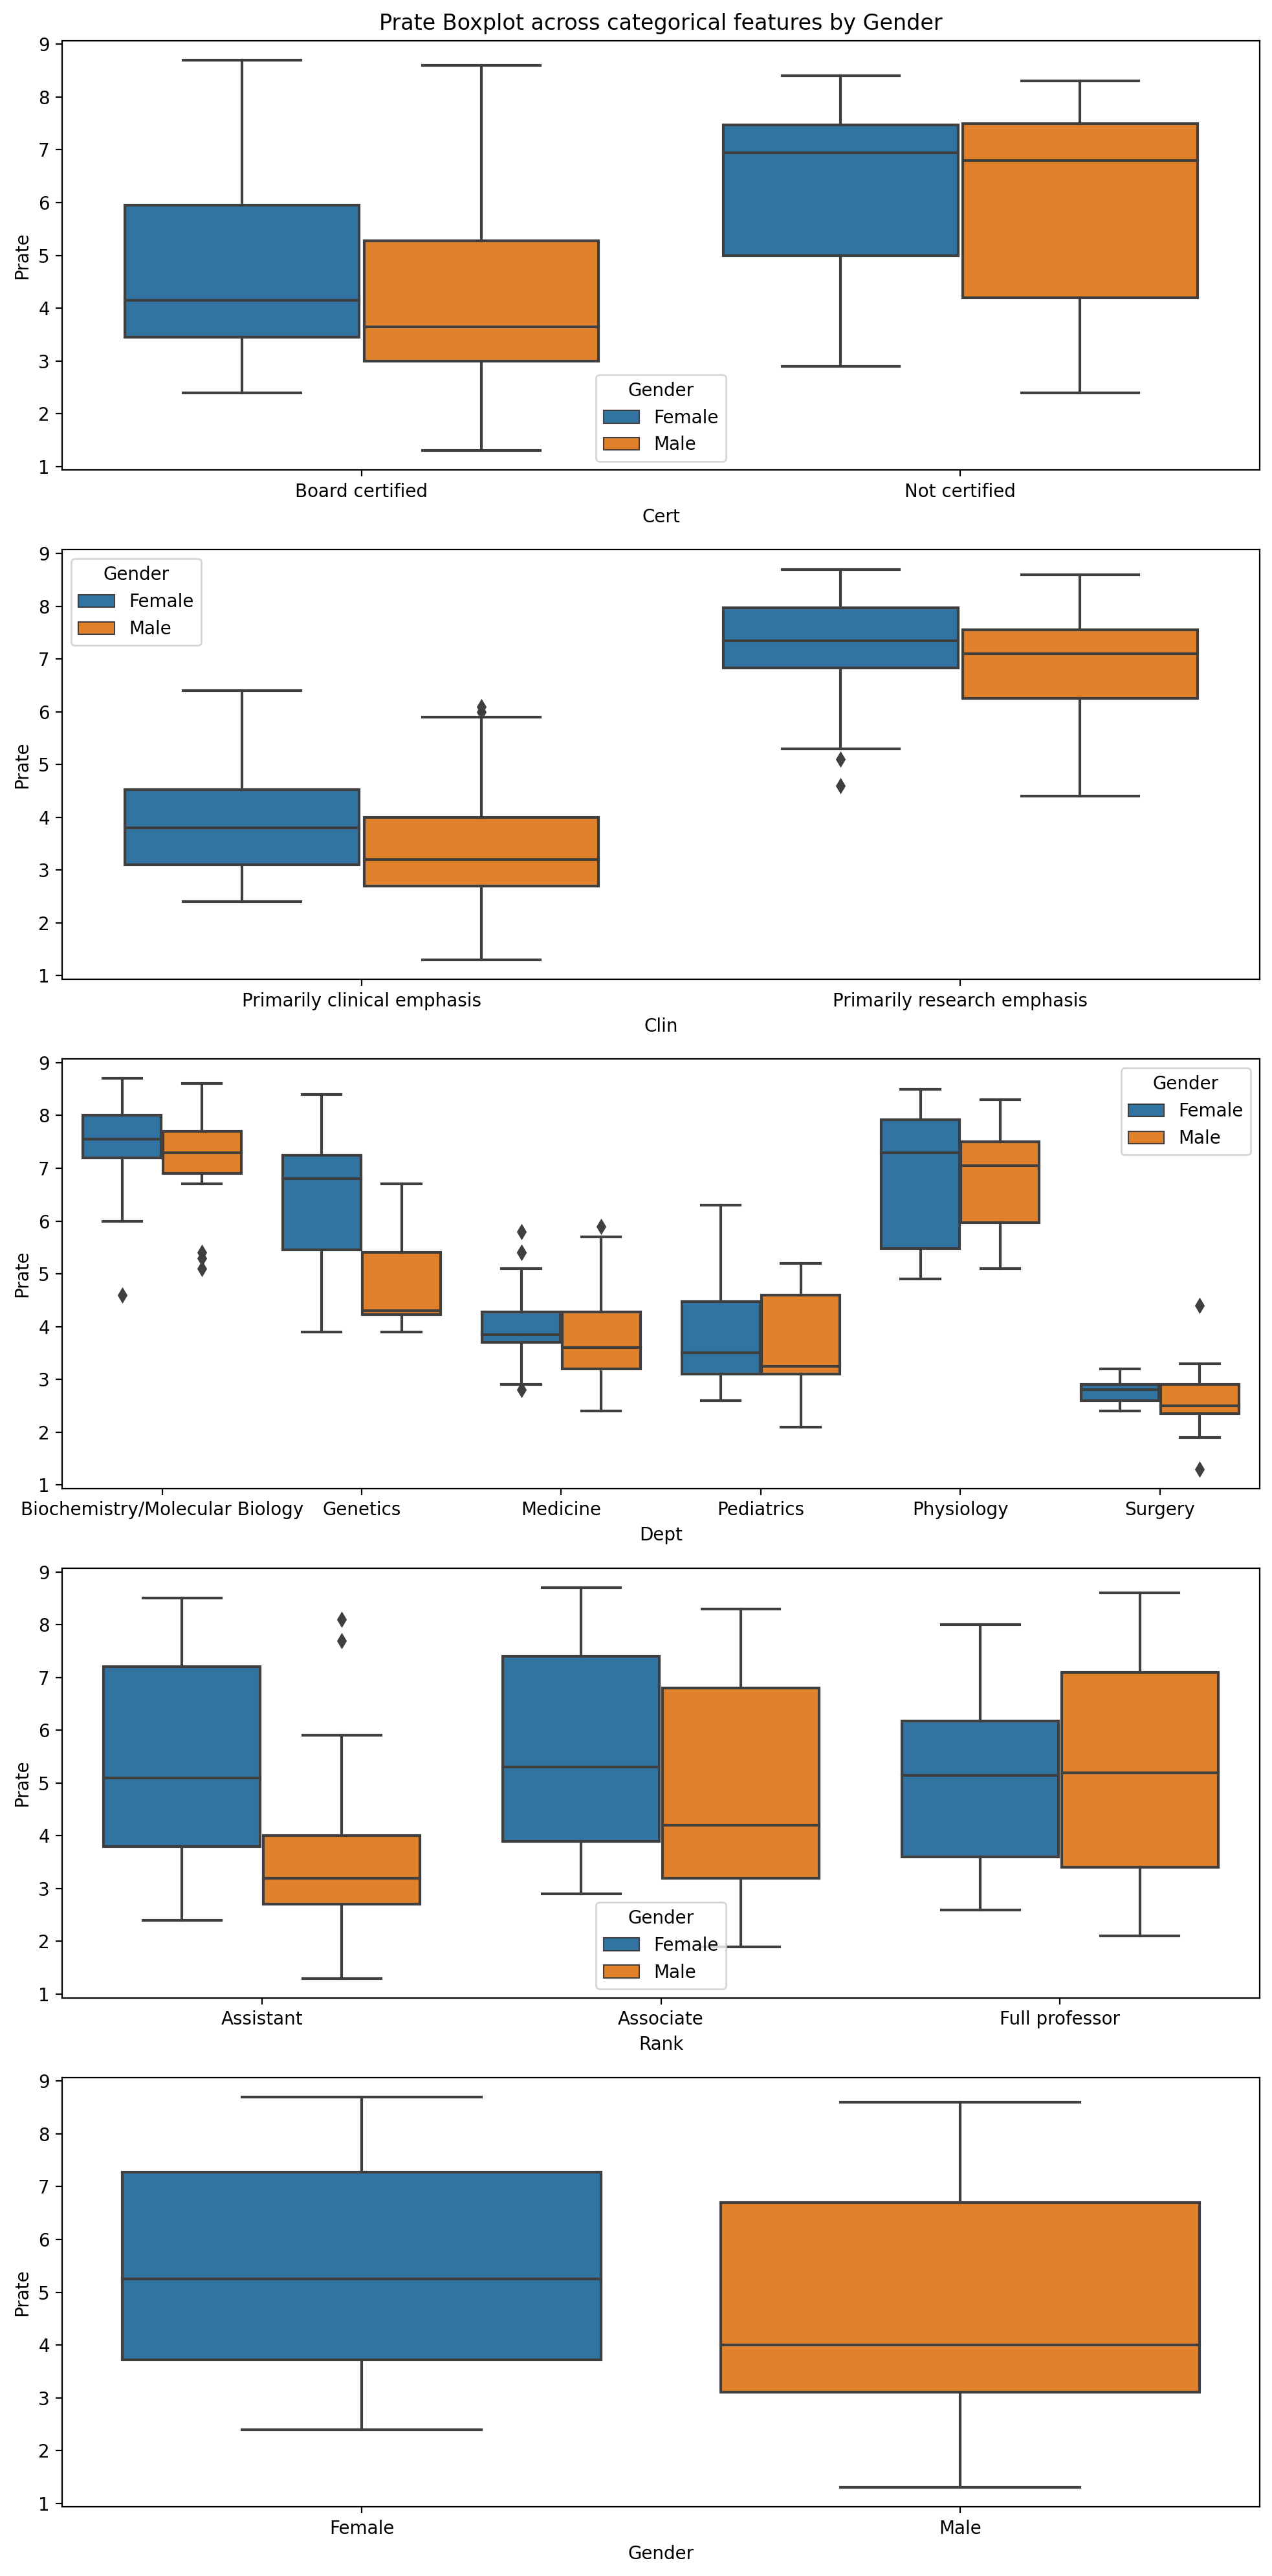

In [211]:
f, ax = plt.subplots(len(categorical_vars),1, figsize=(10,20), dpi=200)

for i in range(len(categorical_vars)):
    c = categorical_vars[i]
    if c == 'Gender':
        sns.boxplot(data=df, x=c, y='Prate', ax=ax[i])
    else:    
        sns.boxplot(data=df, x=c, y='Prate', hue='Gender', ax=ax[i])

ax[0].set_title('Prate Boxplot across categorical features by Gender')
plt.tight_layout()
plt.show();

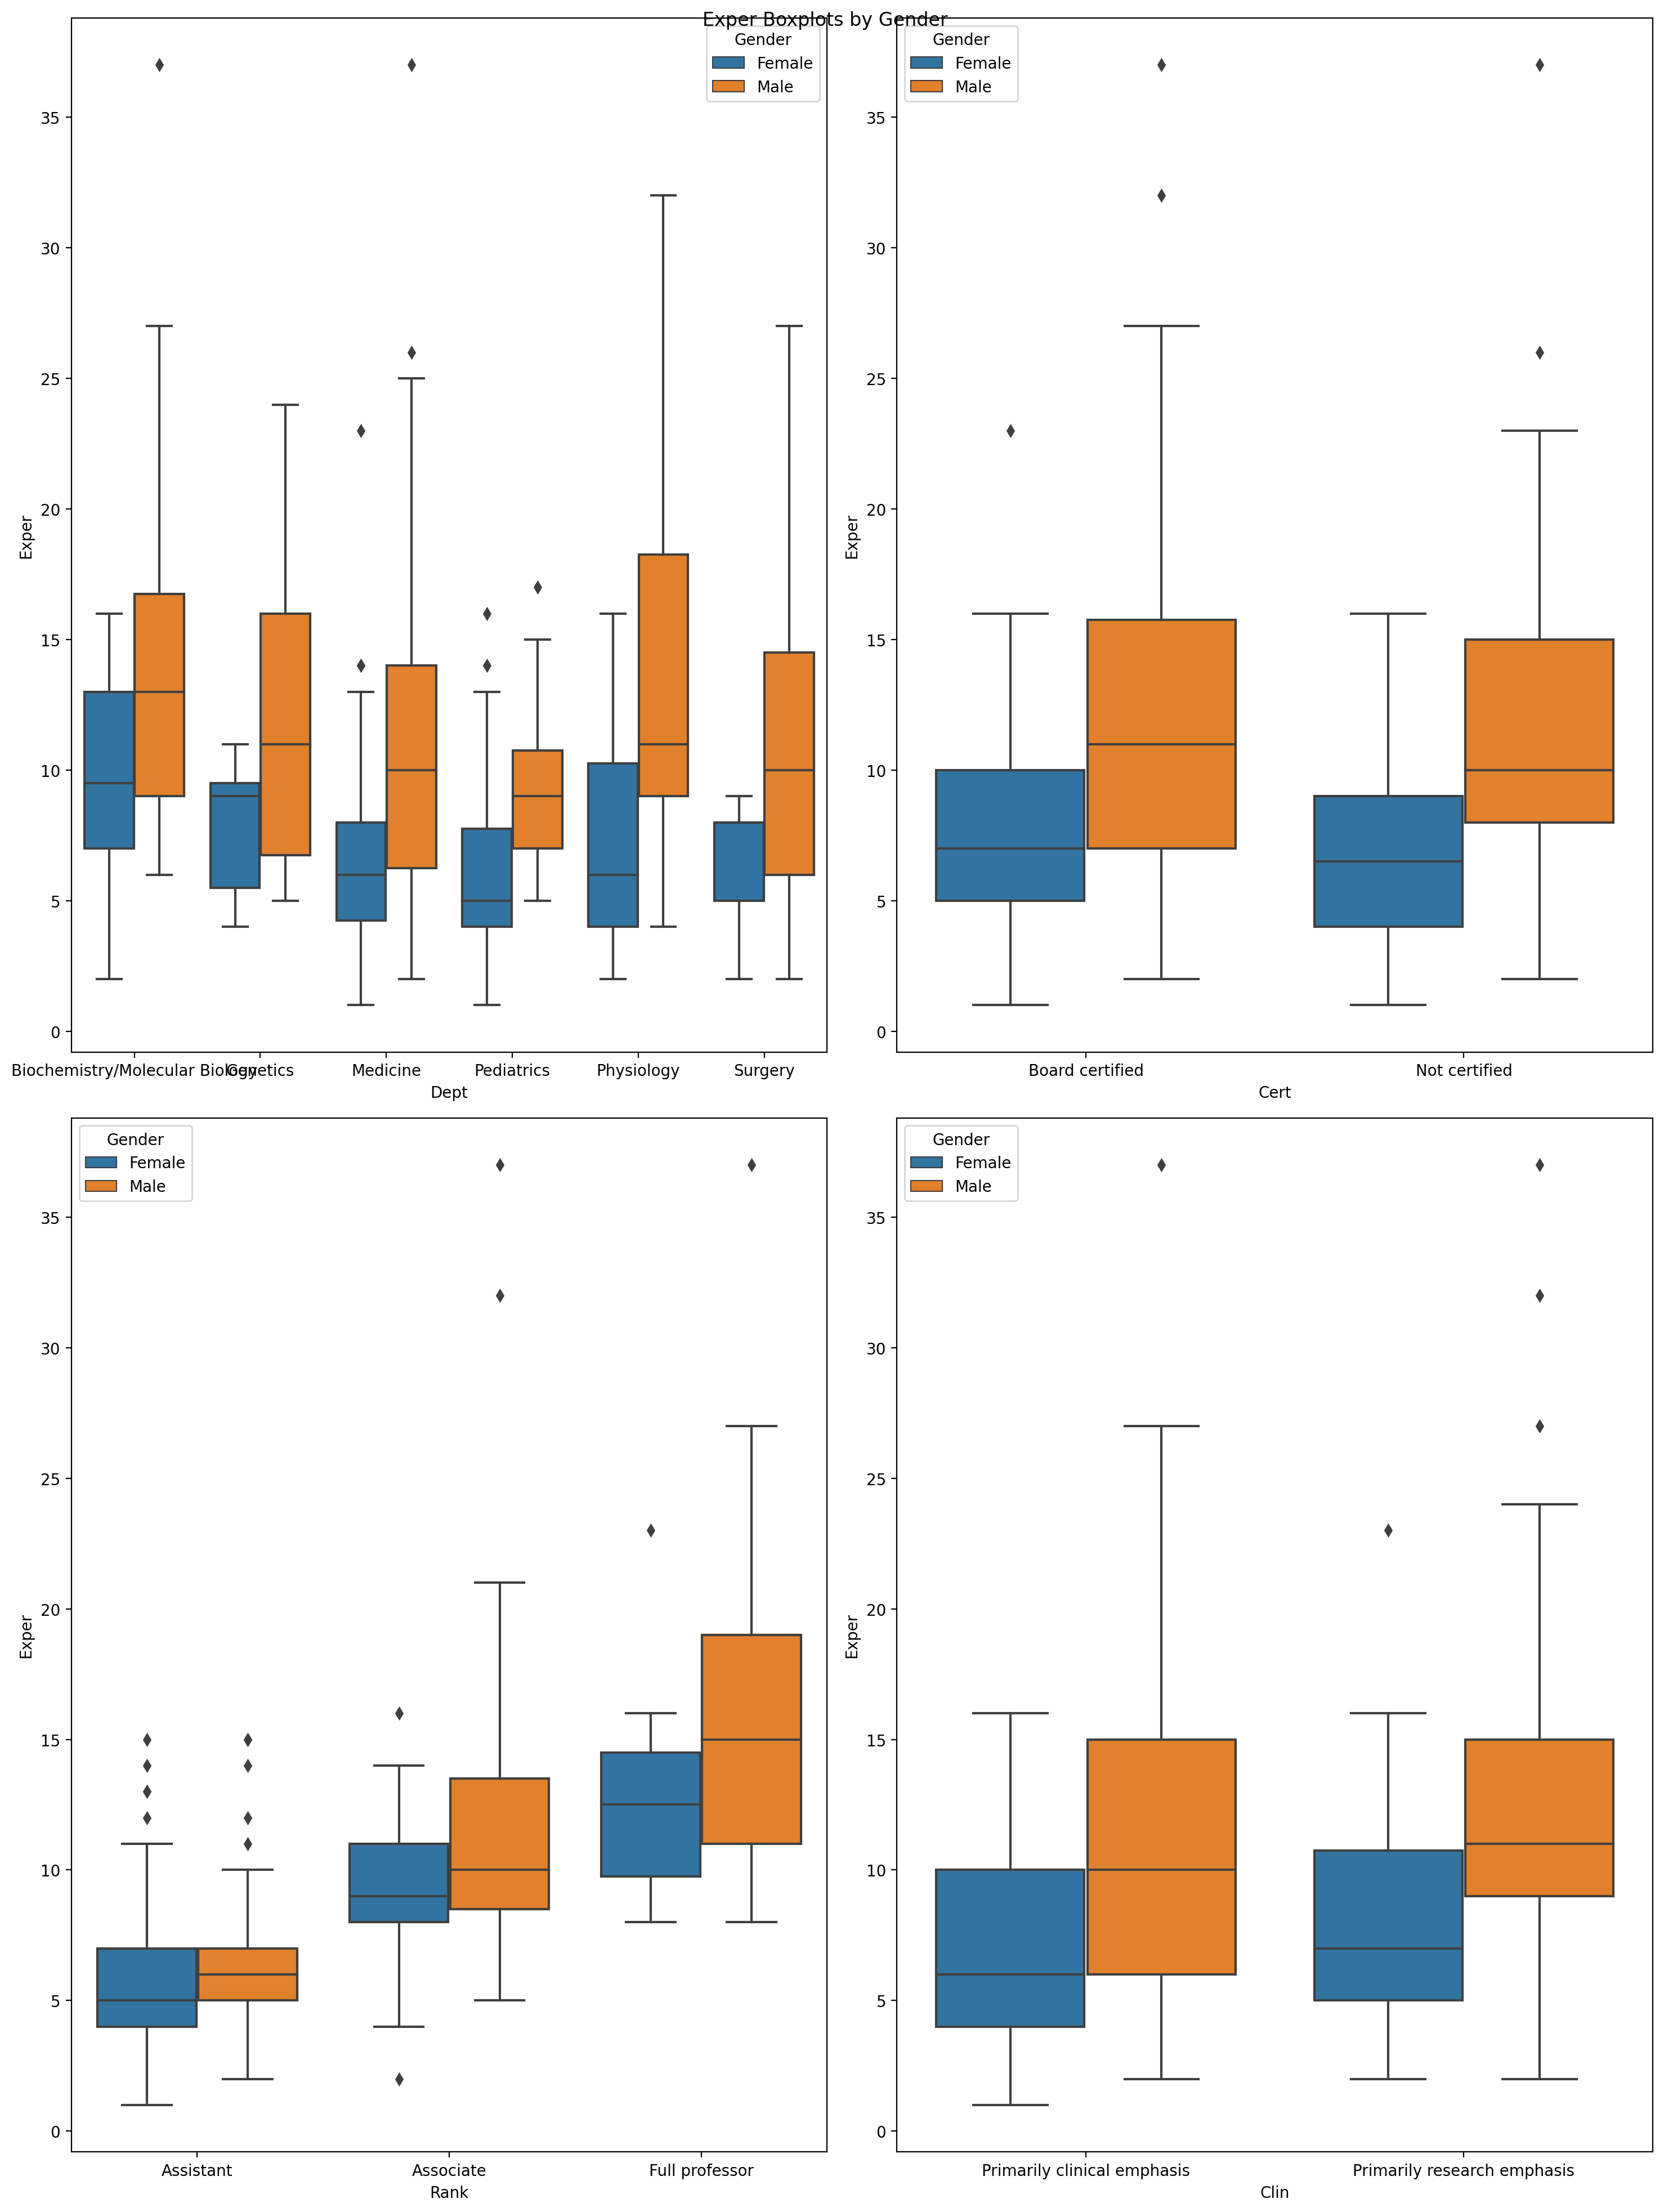

In [261]:
categorical_vars = list(set(df.columns) - set(df._get_numeric_data().columns))

f, ax = plt.subplots(2,2, figsize=(15,20), dpi=200)

for i in range(len(categorical_vars)):
    c = categorical_vars[i]
    if c == 'Gender':
#         sns.boxplot(data=df, x=c, y='Exper', ax=ax[i])
        pass
    else:    
        sns.boxplot(data=df, x=c, y='Exper', hue='Gender', ax=ax[i%2, int(i/2)-1])

plt.suptitle('Exper Boxplots by Gender')
plt.tight_layout()
plt.show();

## Feature Importance with Decision Trees

In [163]:
df

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,sal_increase
0,1,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,7.4,9,Full professor,77836,84612,0.087055
1,2,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,6.7,10,Associate,69994,78497,0.121482
2,3,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,8.1,6,Assistant,62872,67756,0.077682
3,4,Biochemistry/Molecular Biology,Male,Primarily clinical emphasis,Board certified,5.1,27,Full professor,155196,173220,0.116137
4,5,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,7.0,10,Full professor,89268,96099,0.076522
...,...,...,...,...,...,...,...,...,...,...,...
256,257,Surgery,Female,Primarily clinical emphasis,Board certified,2.9,8,Associate,297174,323699,0.089257
257,258,Surgery,Female,Primarily clinical emphasis,Board certified,2.6,9,Full professor,308081,339664,0.102515
258,259,Surgery,Female,Primarily clinical emphasis,Board certified,2.8,8,Assistant,211269,241577,0.143457
259,260,Surgery,Female,Primarily clinical emphasis,Board certified,2.4,2,Assistant,210801,233905,0.109601


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            261 non-null    int64   
 1   Dept          261 non-null    category
 2   Gender        261 non-null    category
 3   Clin          261 non-null    category
 4   Cert          261 non-null    category
 5   Prate         261 non-null    float64 
 6   Exper         261 non-null    int64   
 7   Rank          261 non-null    category
 8   Sal94         261 non-null    int64   
 9   Sal95         261 non-null    int64   
 10  sal_increase  261 non-null    float64 
dtypes: category(5), float64(2), int64(4)
memory usage: 14.3 KB


In [287]:
df

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,sal_increase
0,1,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,7.4,9,Full professor,77836,84612,0.087055
1,2,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,6.7,10,Associate,69994,78497,0.121482
2,3,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,8.1,6,Assistant,62872,67756,0.077682
3,4,Biochemistry/Molecular Biology,Male,Primarily clinical emphasis,Board certified,5.1,27,Full professor,155196,173220,0.116137
4,5,Biochemistry/Molecular Biology,Male,Primarily research emphasis,Not certified,7.0,10,Full professor,89268,96099,0.076522
...,...,...,...,...,...,...,...,...,...,...,...
256,257,Surgery,Female,Primarily clinical emphasis,Board certified,2.9,8,Associate,297174,323699,0.089257
257,258,Surgery,Female,Primarily clinical emphasis,Board certified,2.6,9,Full professor,308081,339664,0.102515
258,259,Surgery,Female,Primarily clinical emphasis,Board certified,2.8,8,Assistant,211269,241577,0.143457
259,260,Surgery,Female,Primarily clinical emphasis,Board certified,2.4,2,Assistant,210801,233905,0.109601


0.47742153903910584
Mean Squared Error (MSE): 0.23


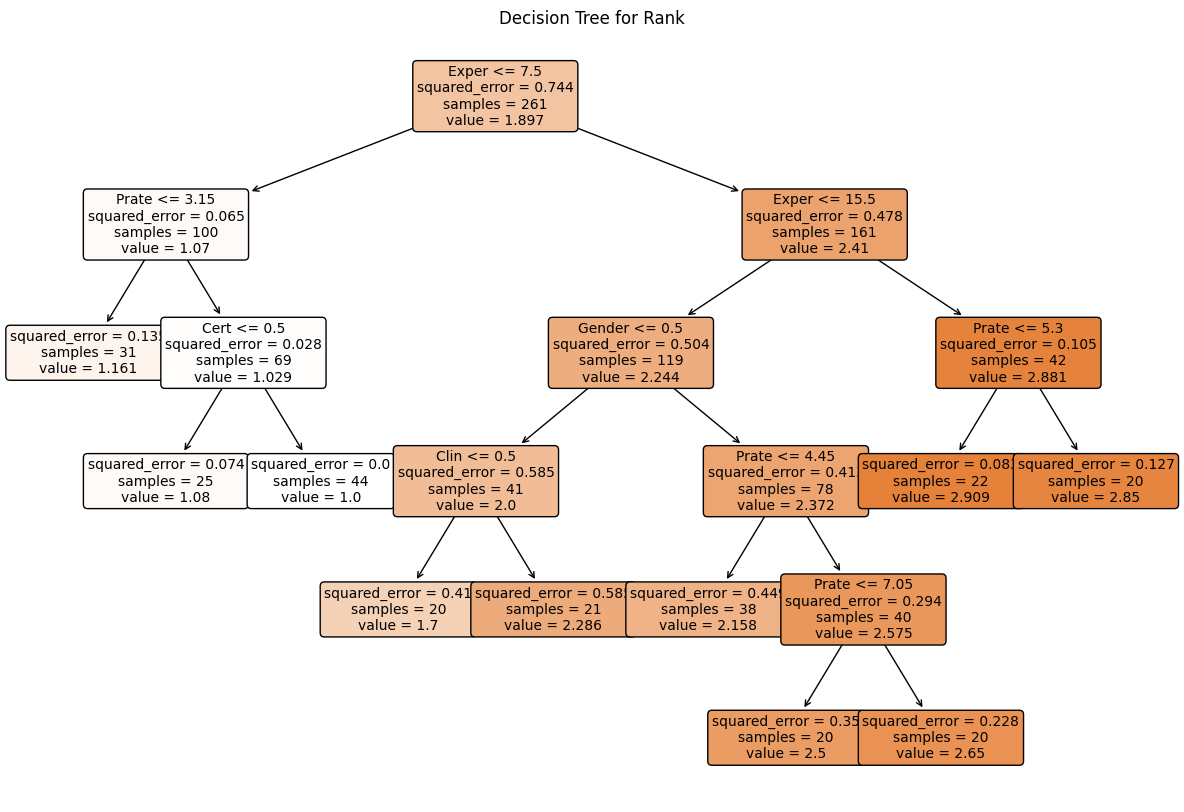

In [265]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# read in data
hi = pd.read_csv('Lawsuit.csv')

# Convert columns to categorical
hi['Dept'] = hi['Dept'].astype('category')
hi['Gender'] = hi['Gender'].astype('category')
hi['Clin'] = hi['Clin'].astype('category')
hi['Cert'] = hi['Cert'].astype('category')
hi['Rank'] = hi['Rank'].astype('category')


X = hi.drop(columns=['Sal94', 'Sal95', 'ID', 'Rank'])
y = hi['Rank']

# Create a Decision Tree Regressor
dtree = DecisionTreeRegressor(
    max_depth=5,                # Set the maximum depth of the tree
    min_samples_leaf=20,         # Set the minimum samples per leaf node
    min_samples_split=25,       # Set the minimum samples per split
    max_leaf_nodes=None,        # Optionally limit the maximum number of leaf nodes
    random_state=42
)

# Fit the model to the training data
dtree.fit(X, y)

# Make predictions on the test set
y_pred = dtree.predict(X)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y, y_pred)
print(np.sqrt(mse))
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Rank")
plt.show()

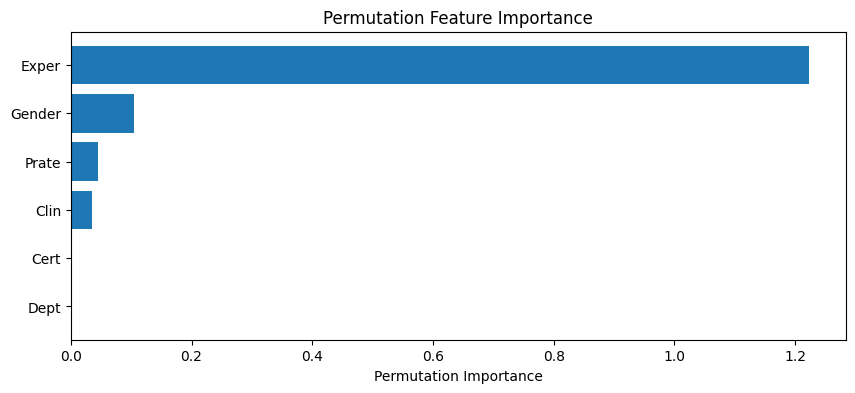

In [282]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(dtree, X, y, n_repeats=10, random_state=42)
# Sort the features by their importance scores
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the importances
plt.figure(figsize=(10, 4))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()

In [277]:
import shap

#Get shap values
explainer = shap.Explainer(dtree)
shap_values_cat = explainer(X)

print(np.shape(shap_values_cat))

(261, 6)


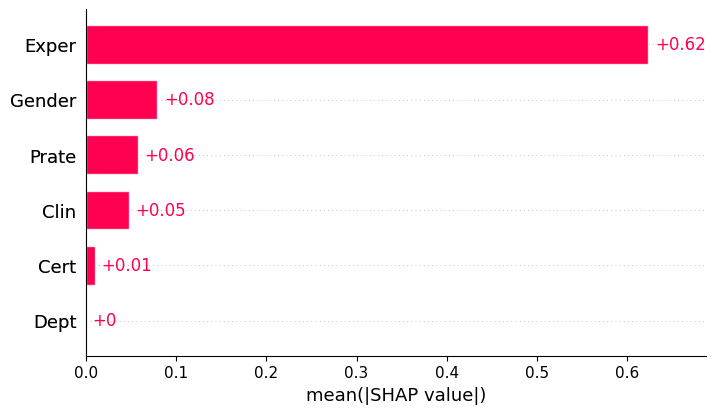

In [298]:
shap.plots.bar(shap_values_cat)

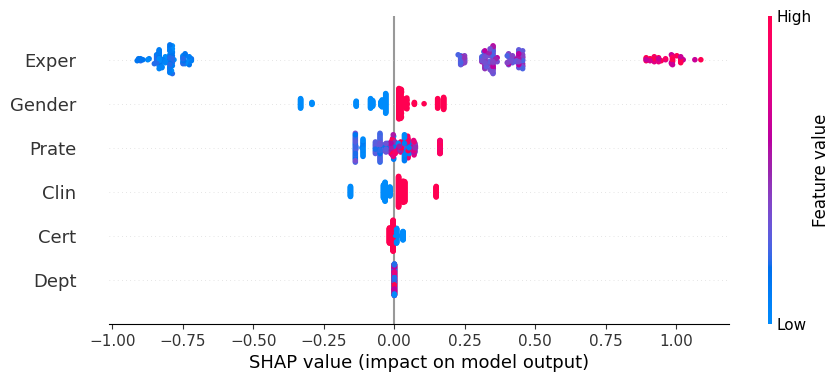

In [281]:
shap.plots.beeswarm(shap_values_cat, plot_size=(10,4))